In [ ]:
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

# 使用LV水平翻轉後訓練的unet在RV資料上測試

/tmp/ipykernel_1447815/392114335.py:227: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


已成功載入預訓練權重：/home/richardlin/home/m123140014/echonet/remote_disk_lab/mask/unet_best_model_LV_HorizontalFlip_112.pth
影片 5ee8197dfe987cf43b5ab6865f0590f6_0000_0000 總幀數：151
影片 5ee8197dfe987cf43b5ab6865f0590f6_0000_0000，顯示幀 26


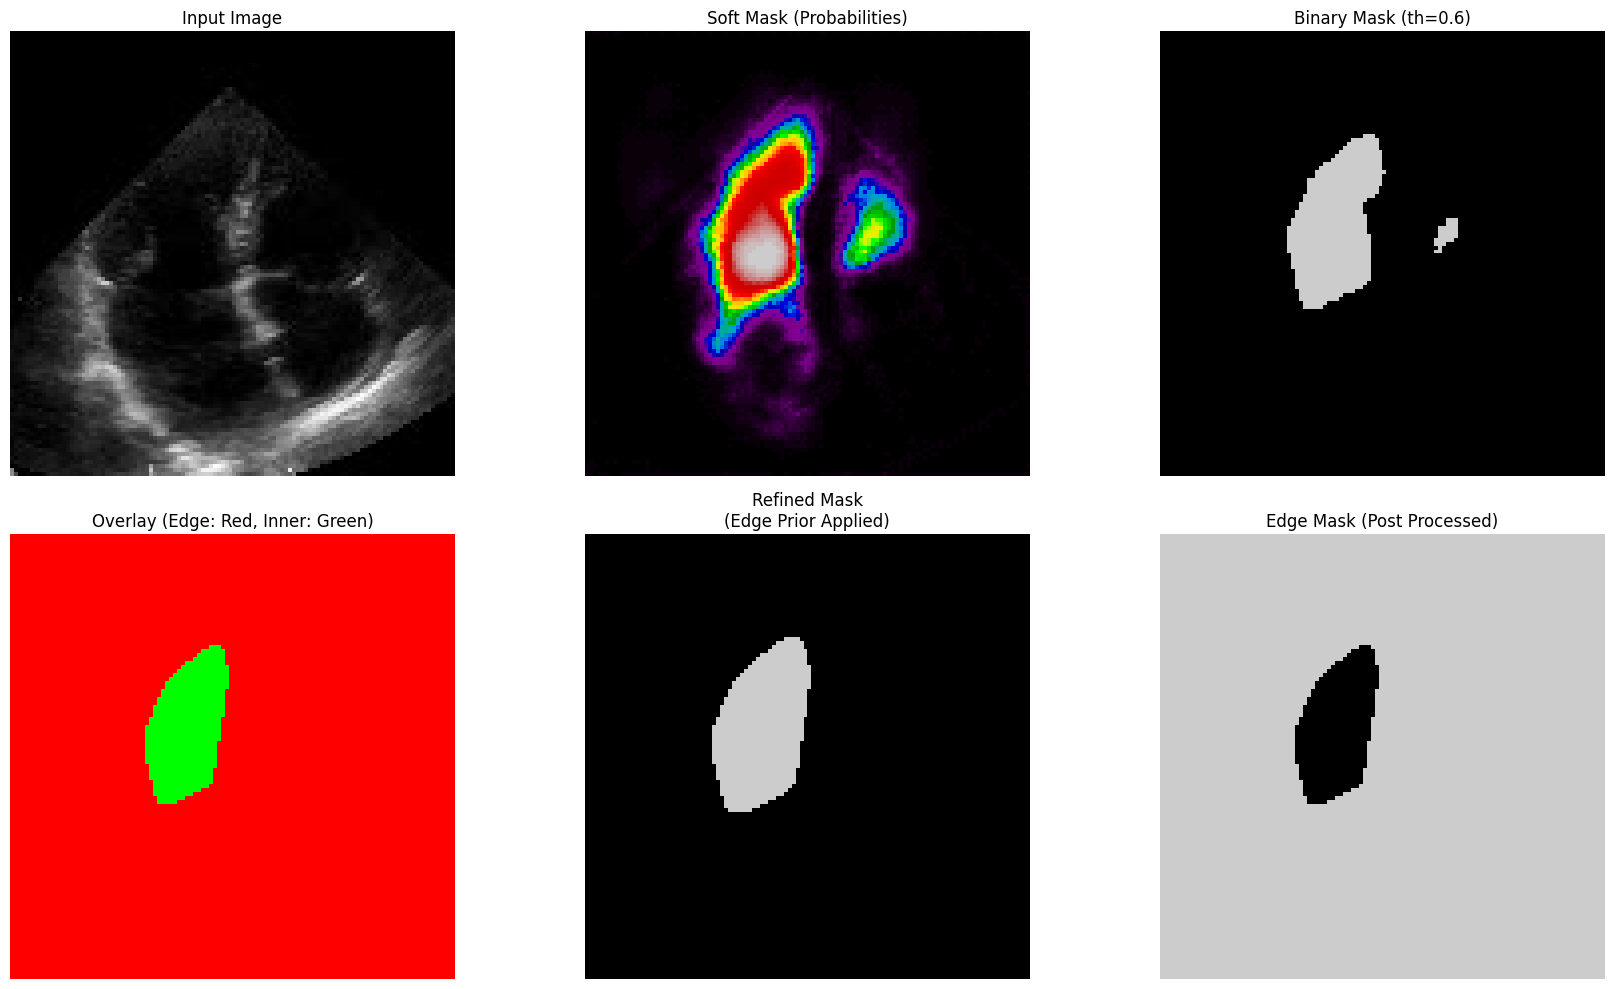

影片 5ee8197dfe987cf43b5ab6865f0590f6_0000_0000，顯示幀 72


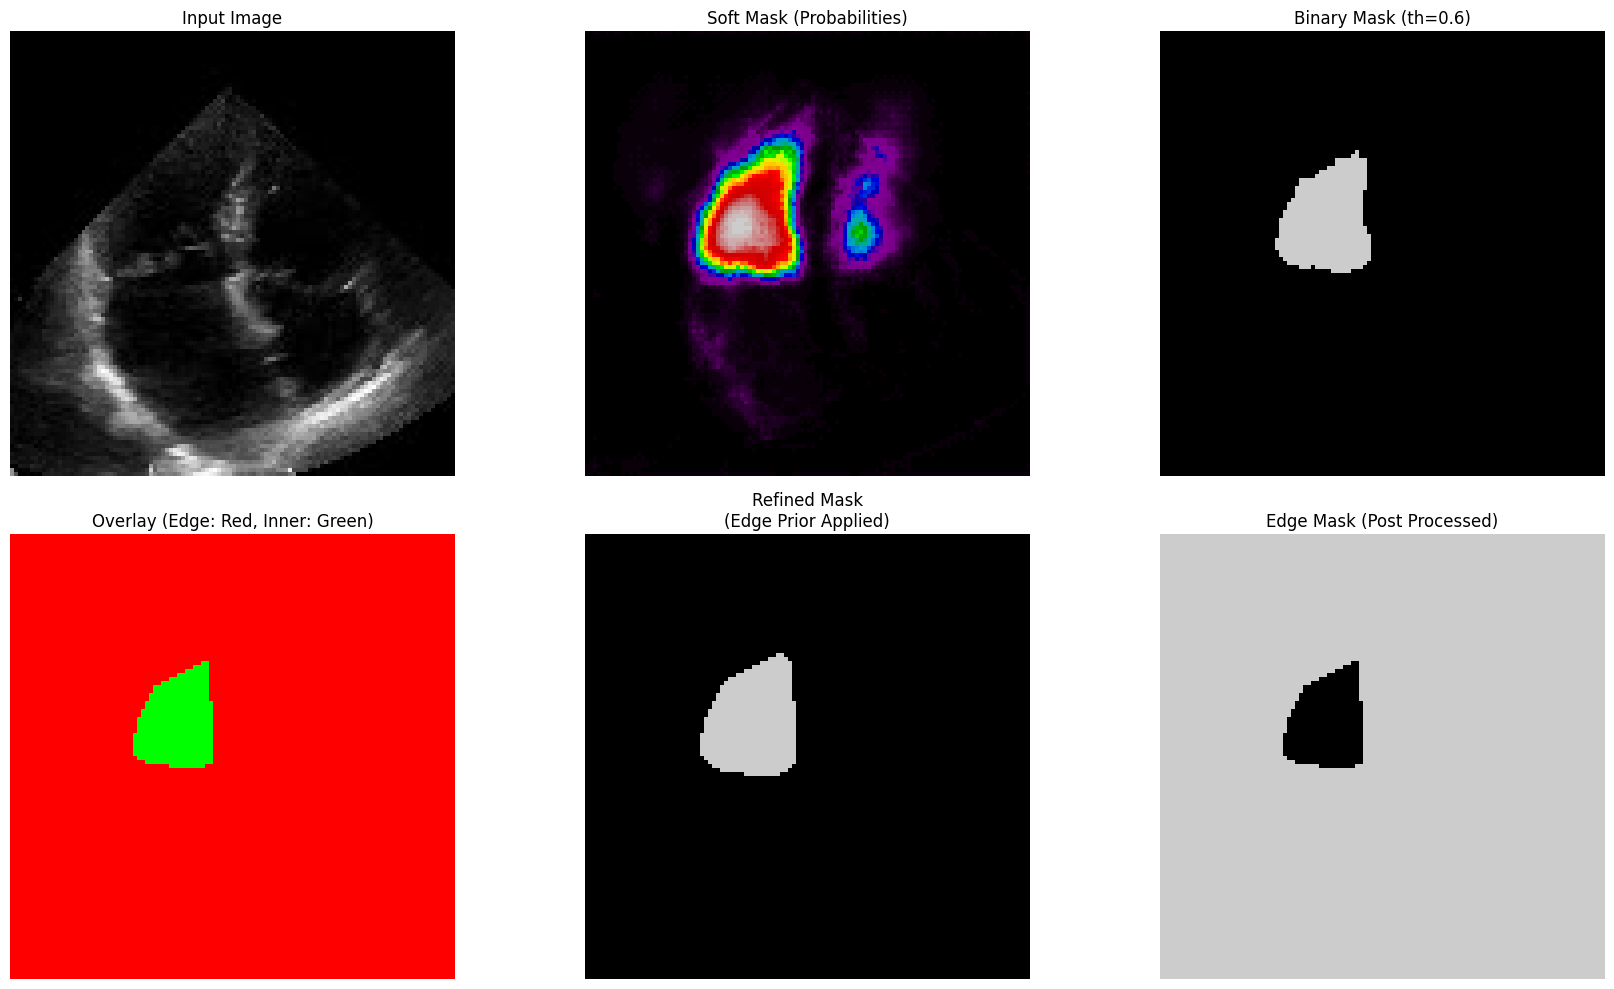

影片 5ee8197dfe987cf43b5ab6865f0590f6_0000_0000，顯示幀 93


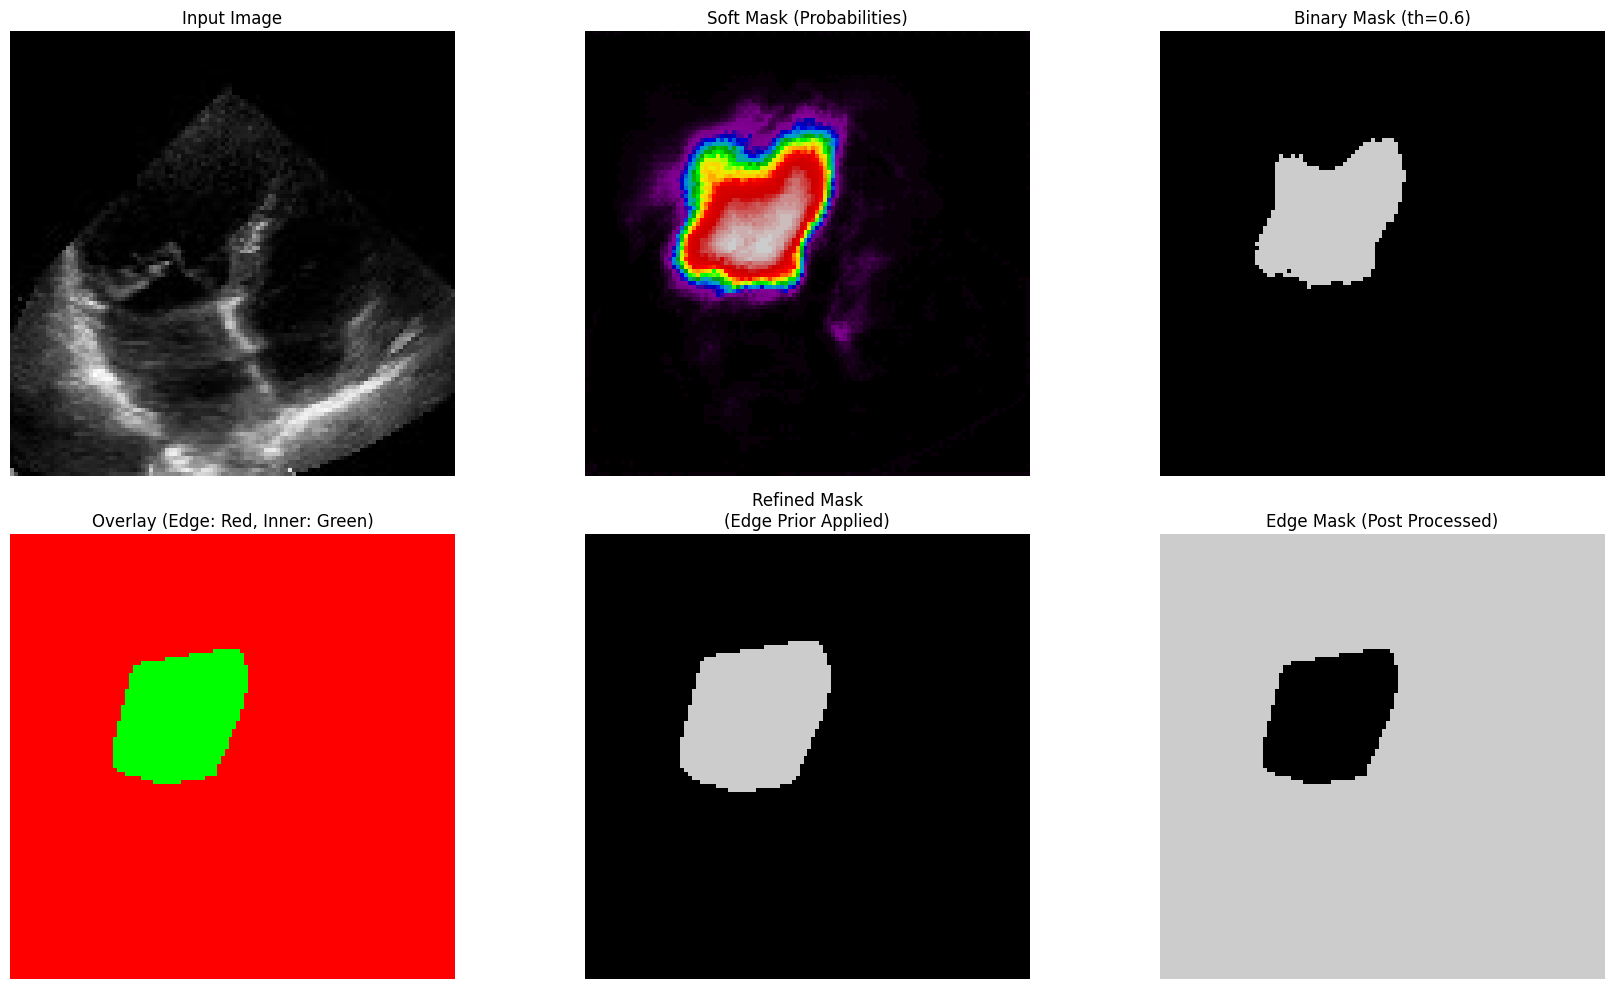

影片 09cb165f2cb739d8d44cdb95b627723b_0000_0001 總幀數：142
影片 09cb165f2cb739d8d44cdb95b627723b_0000_0001，顯示幀 14


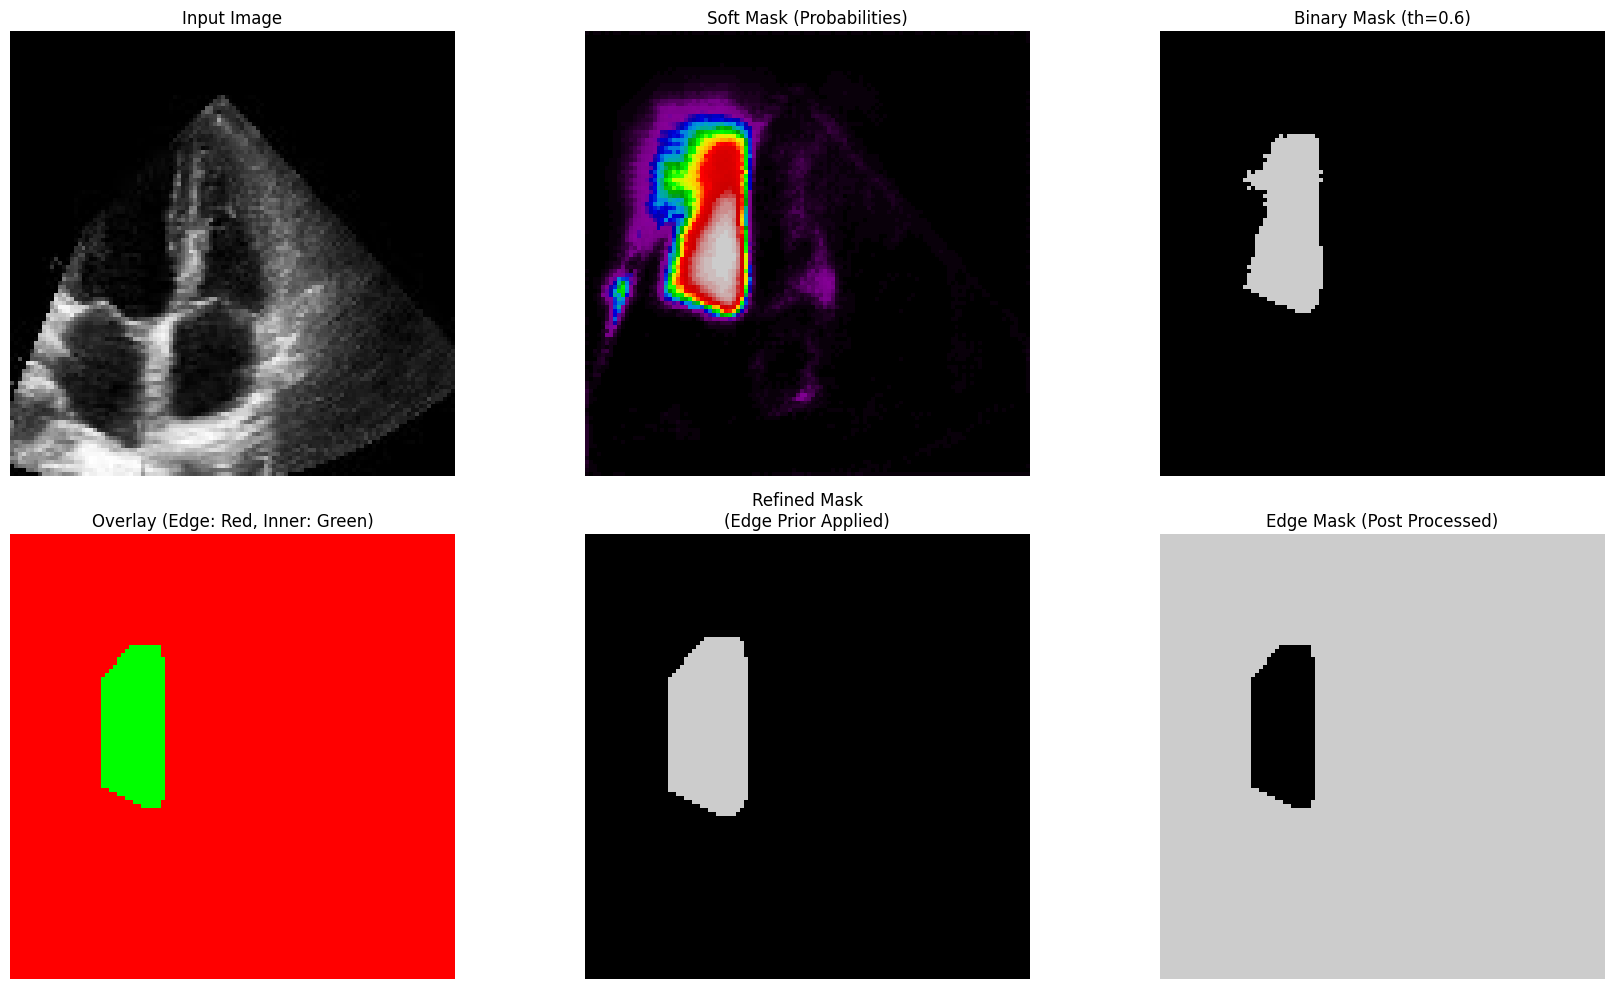

影片 09cb165f2cb739d8d44cdb95b627723b_0000_0001，顯示幀 17


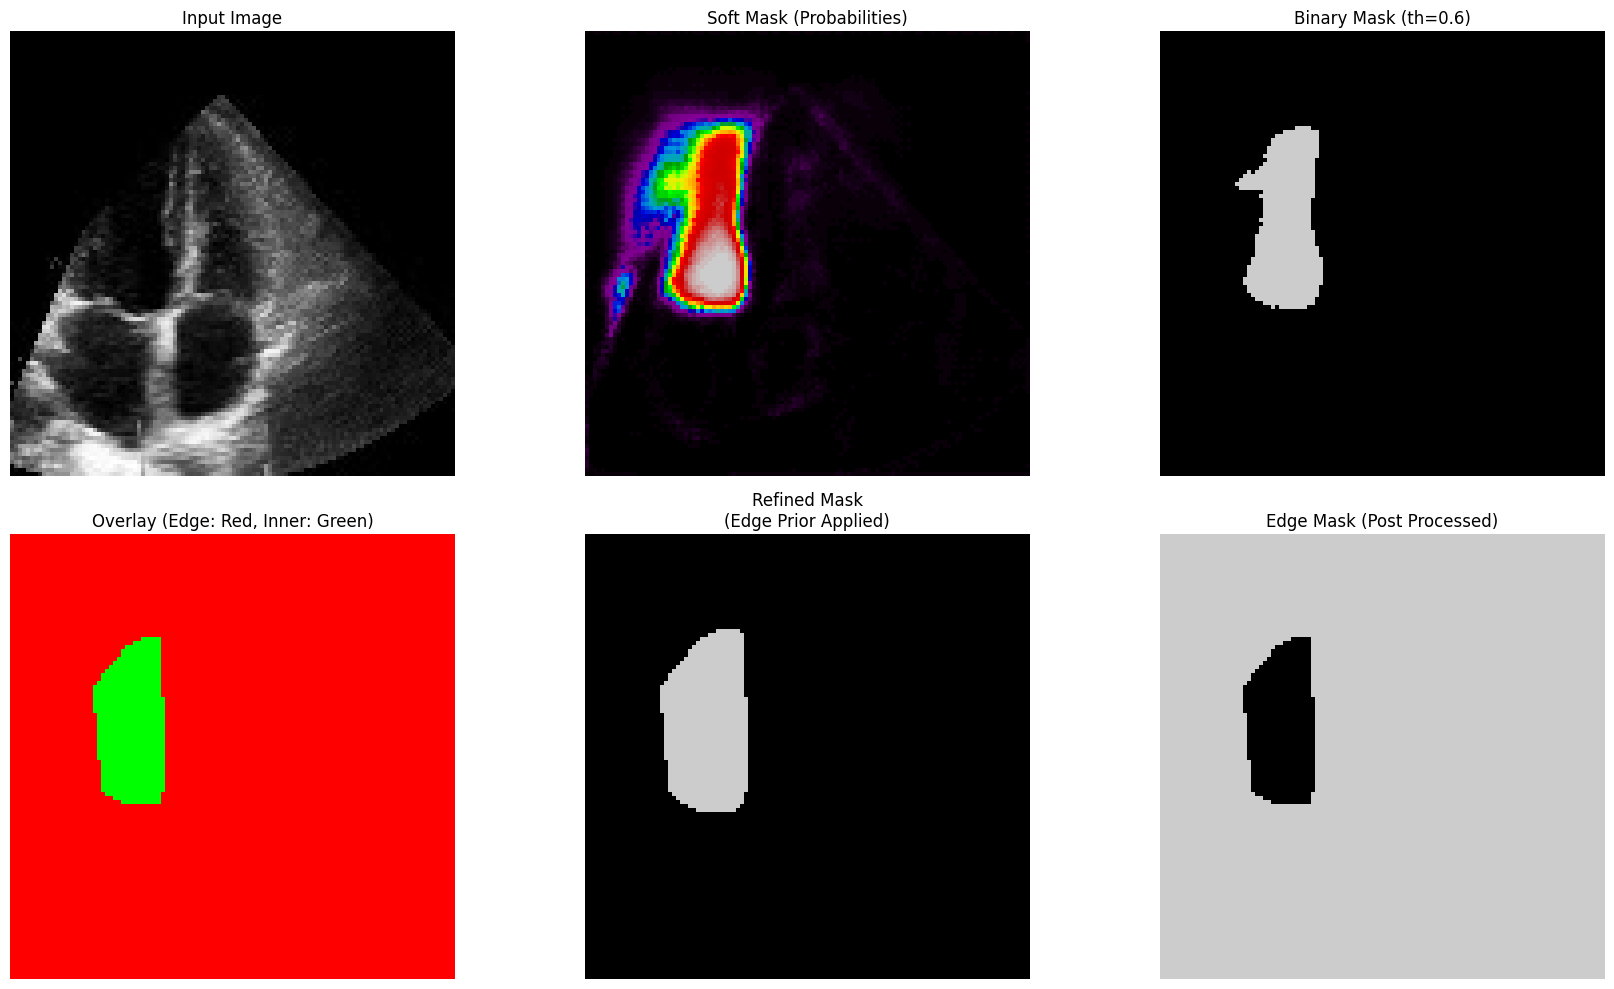

影片 09cb165f2cb739d8d44cdb95b627723b_0000_0001，顯示幀 18


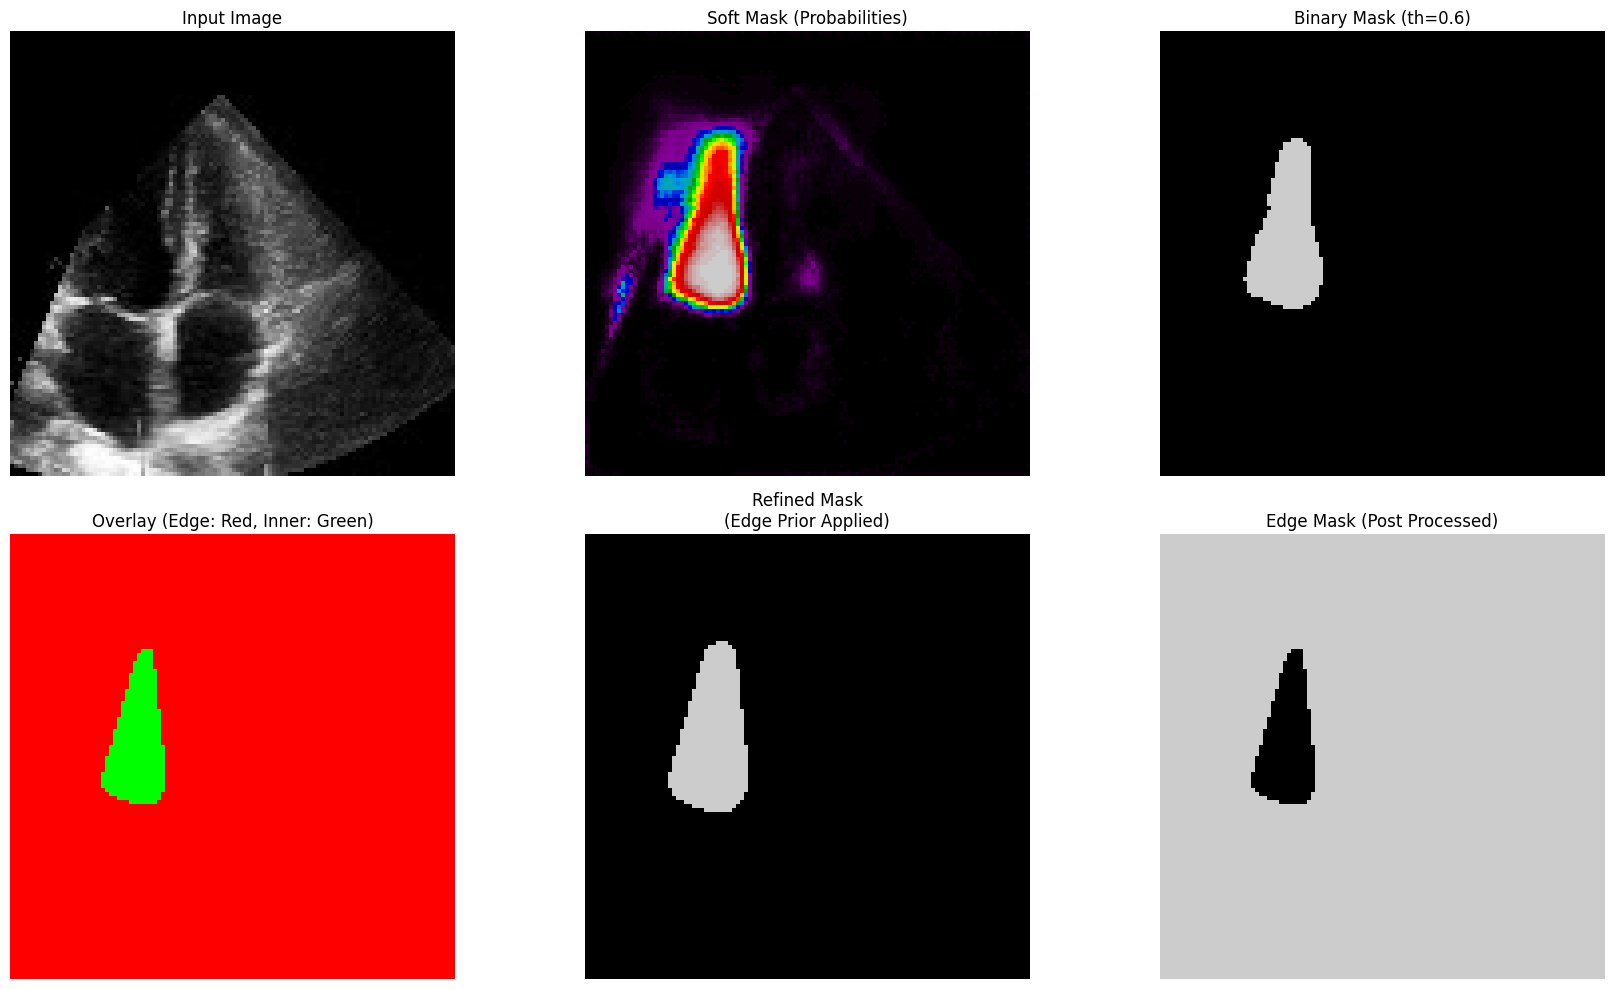

影片 5a363477272db5be6721d902450f00b2_0000_0002 總幀數：186
影片 5a363477272db5be6721d902450f00b2_0000_0002，顯示幀 28


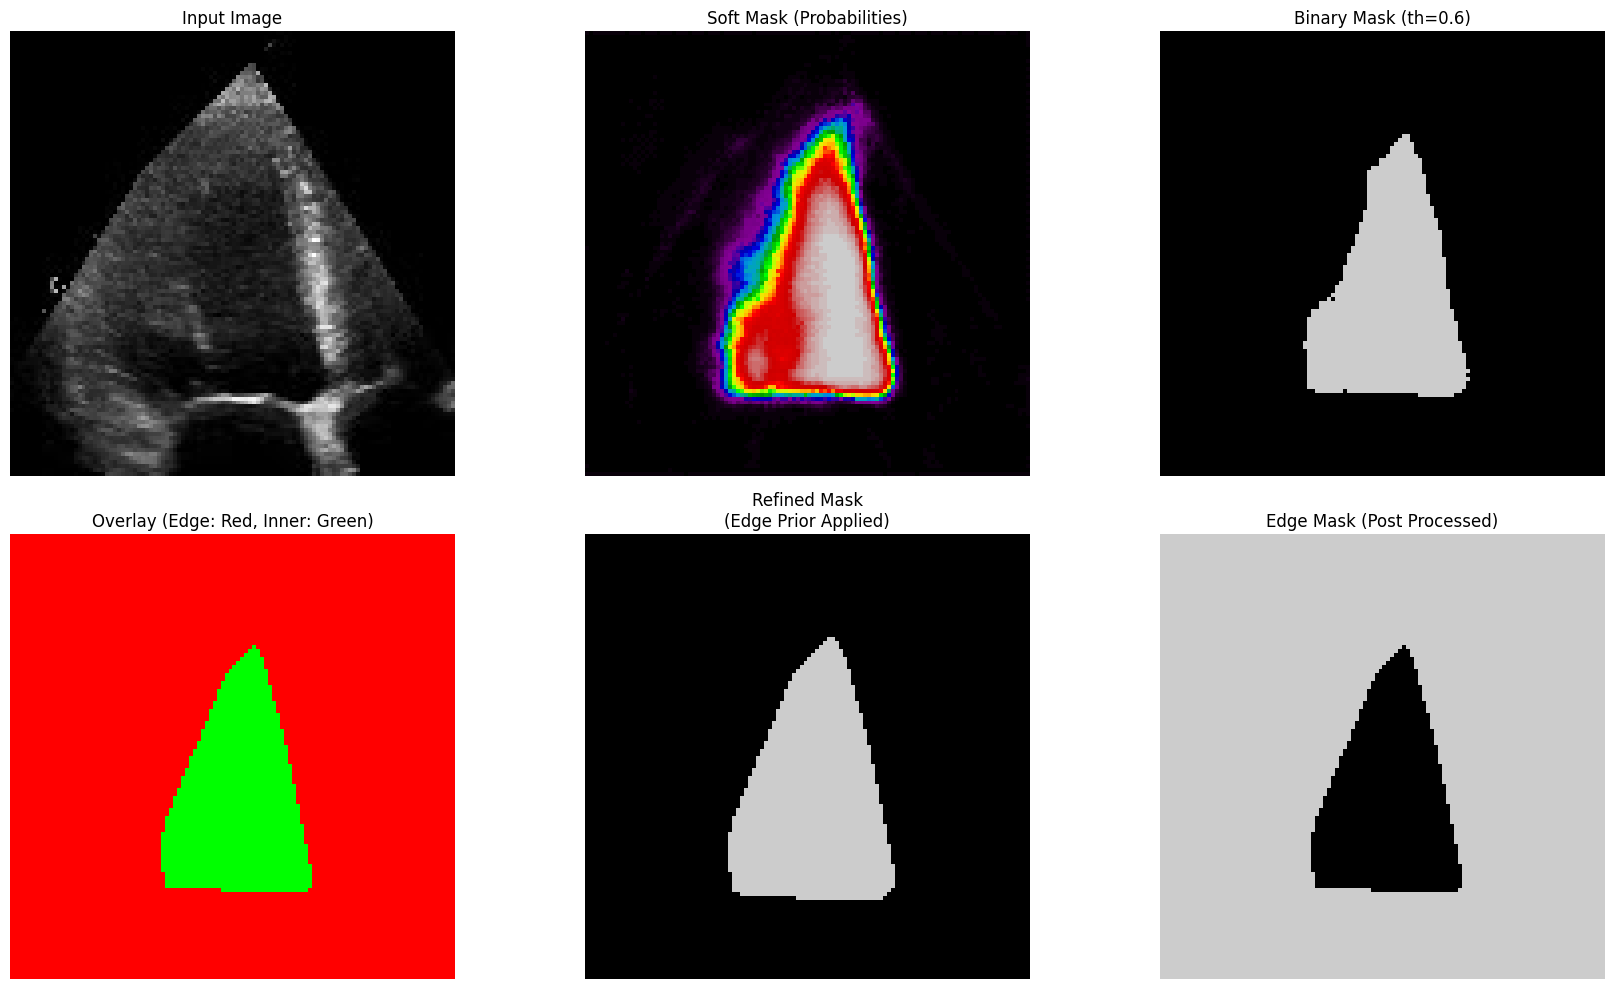

影片 5a363477272db5be6721d902450f00b2_0000_0002，顯示幀 126


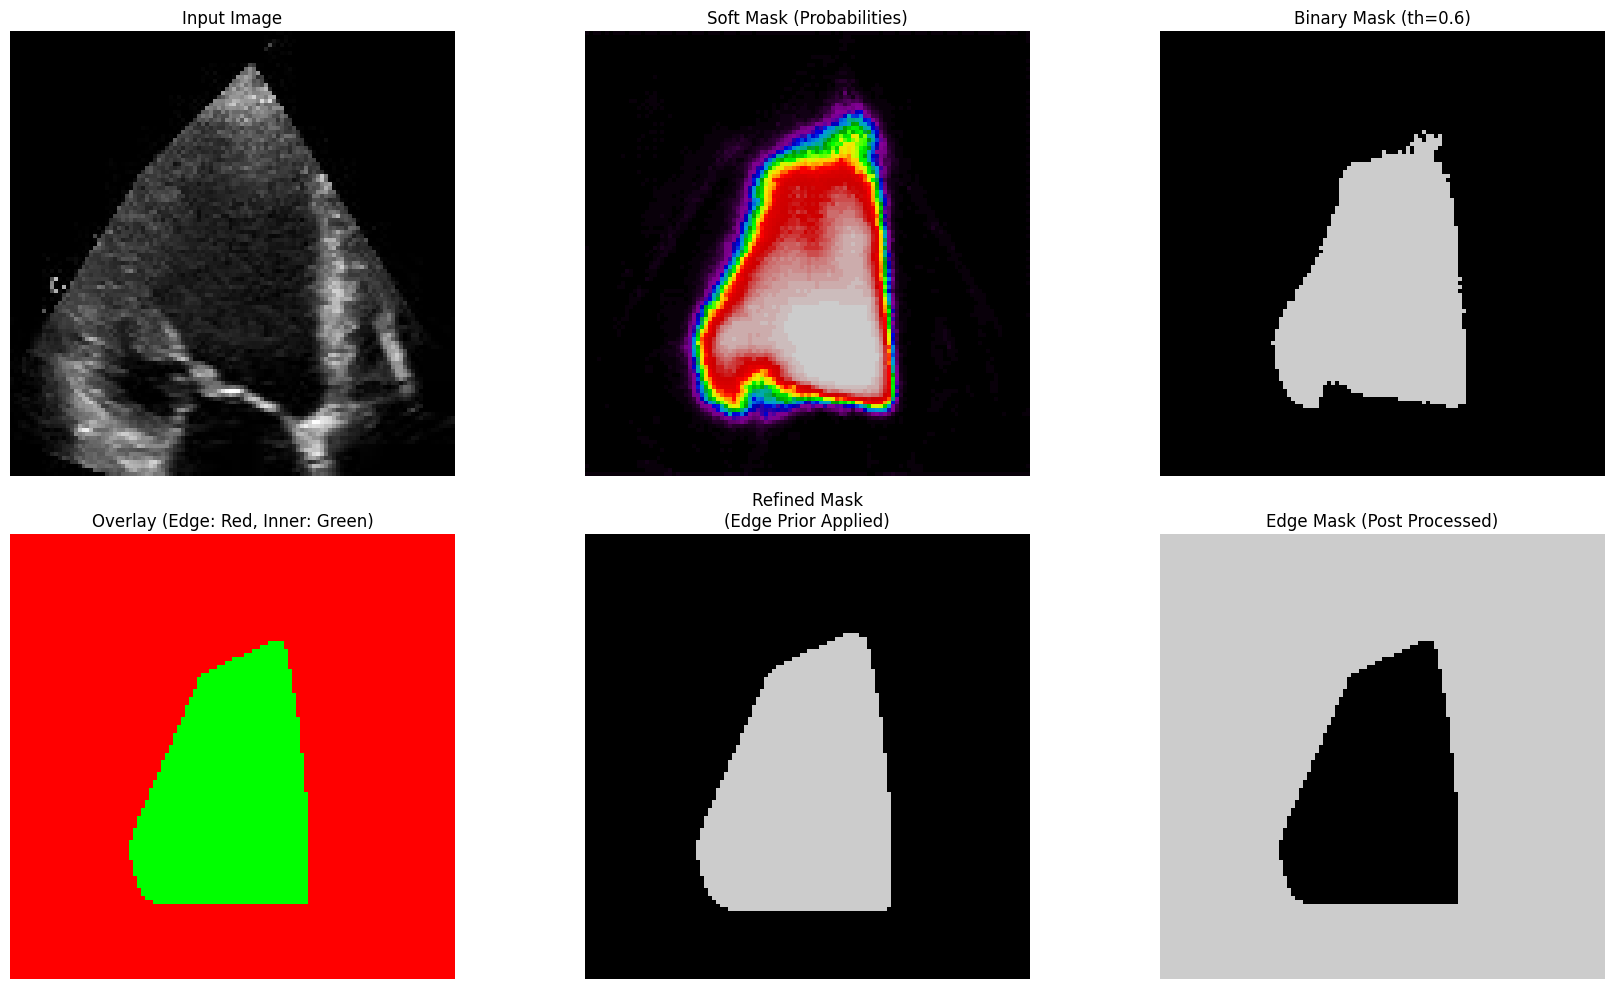

影片 5a363477272db5be6721d902450f00b2_0000_0002，顯示幀 154


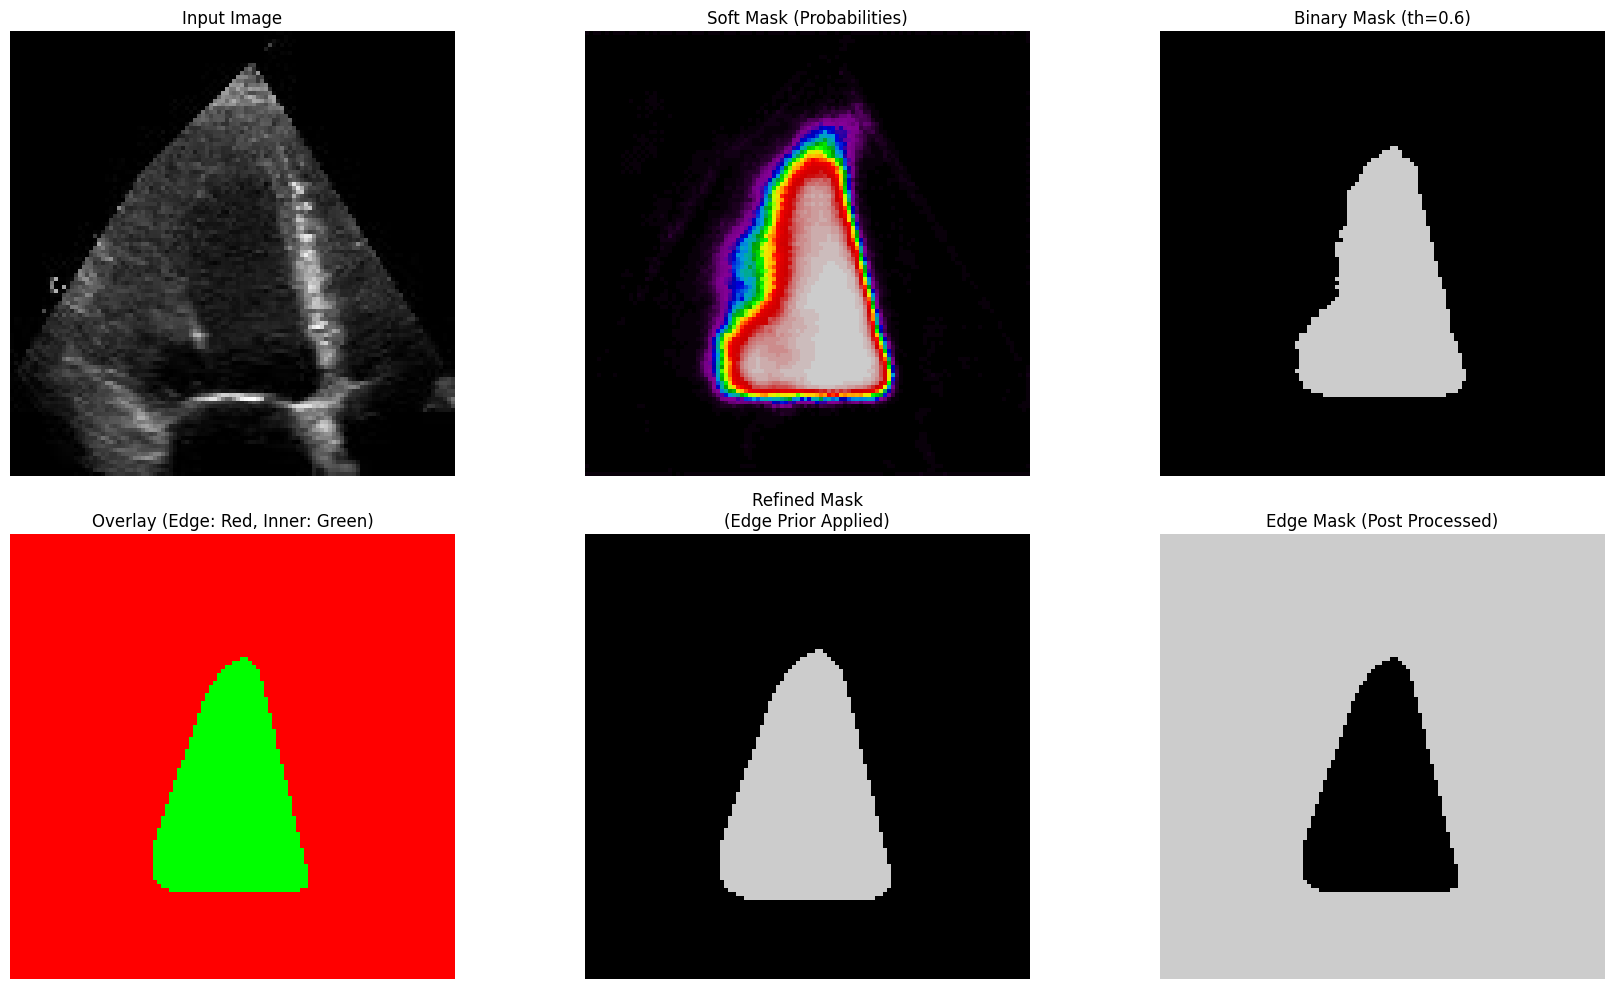

影片 236ce9e4e55909ccd11fae6f81aac71c_0000_0000 總幀數：121
影片 236ce9e4e55909ccd11fae6f81aac71c_0000_0000，顯示幀 23


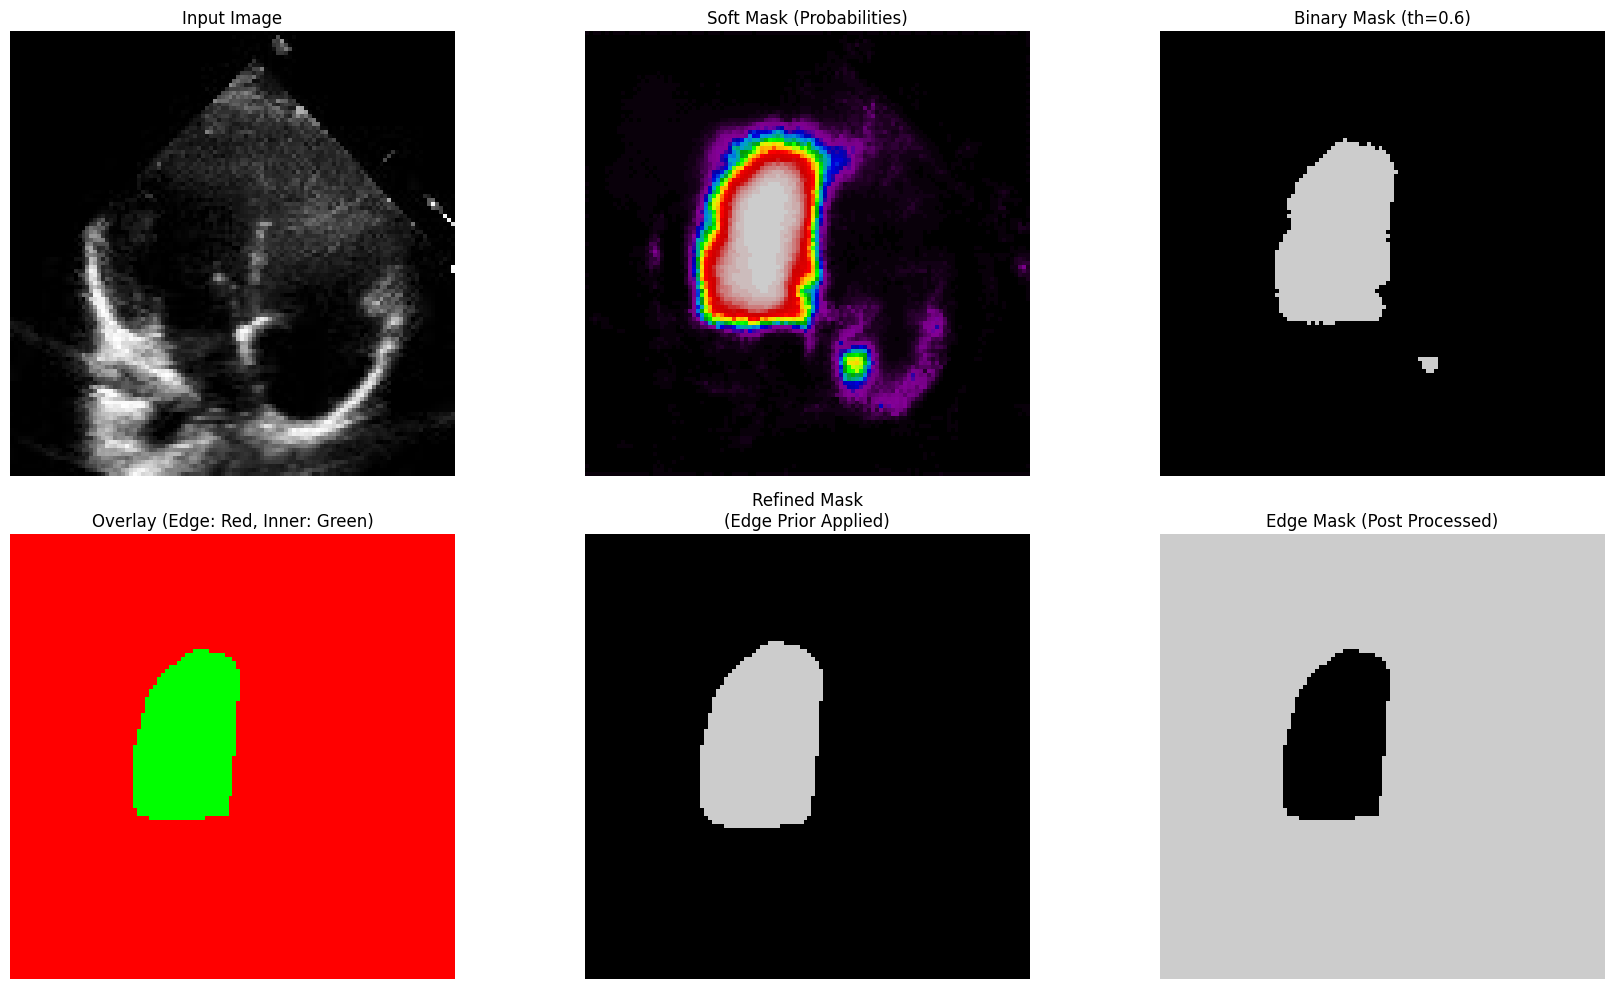

影片 236ce9e4e55909ccd11fae6f81aac71c_0000_0000，顯示幀 45


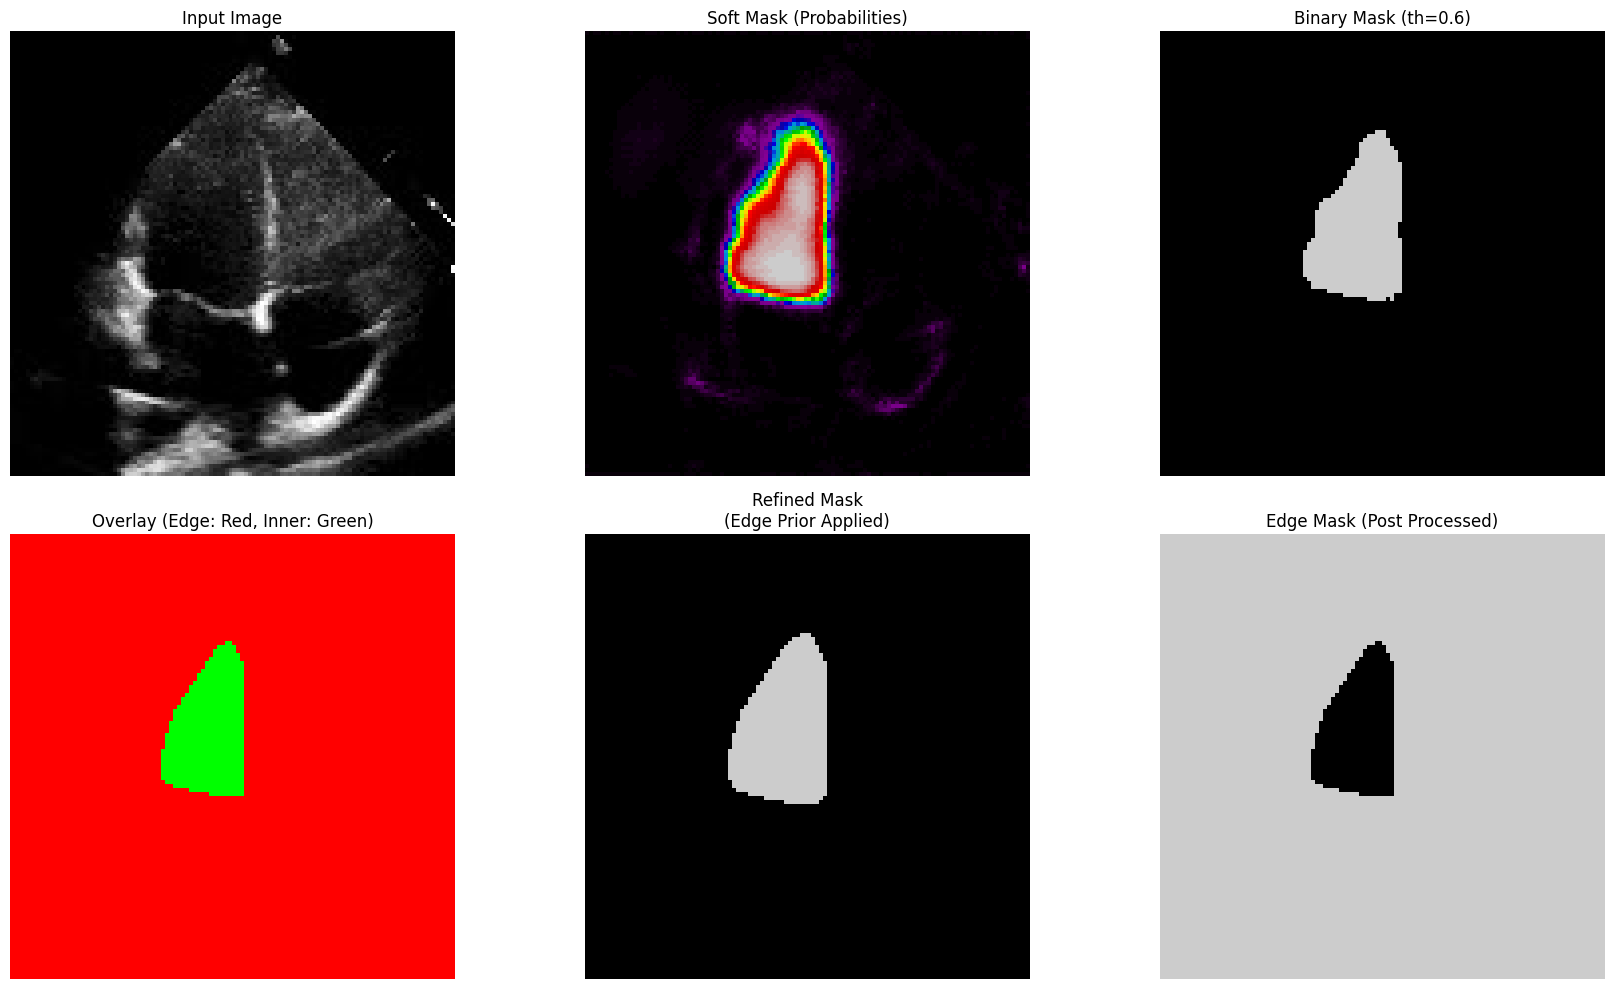

影片 236ce9e4e55909ccd11fae6f81aac71c_0000_0000，顯示幀 70


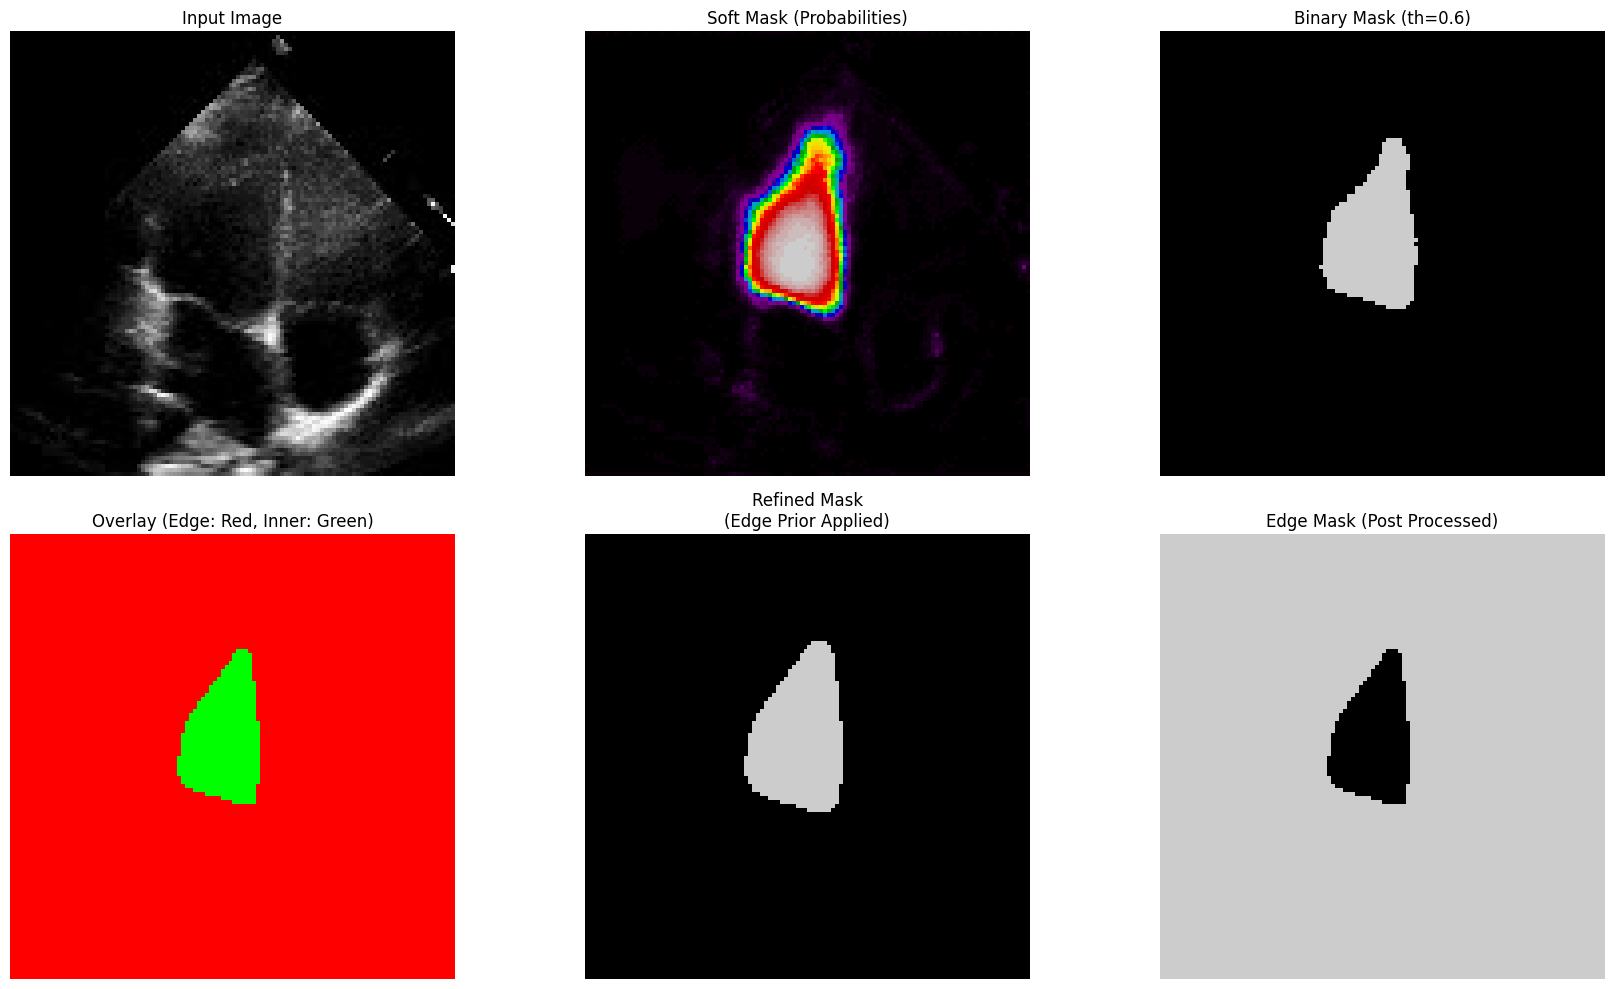

影片 0a65df5ec44d995714744a44c6357d5e_0000_0003 總幀數：200
影片 0a65df5ec44d995714744a44c6357d5e_0000_0003，顯示幀 108


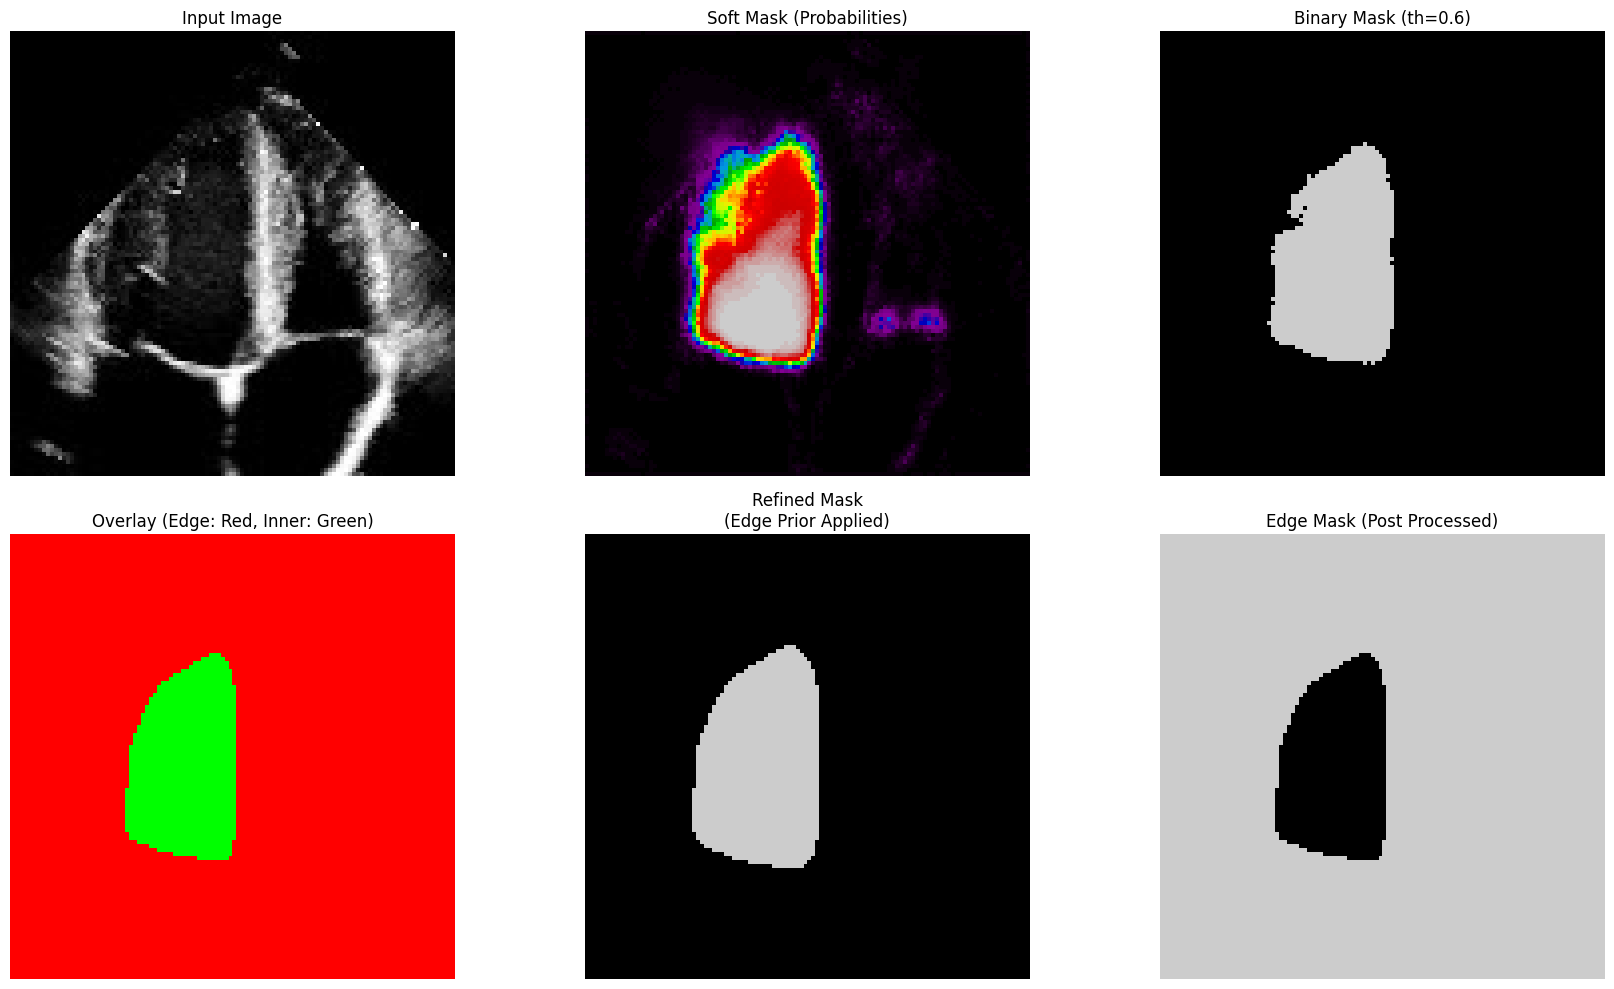

影片 0a65df5ec44d995714744a44c6357d5e_0000_0003，顯示幀 110


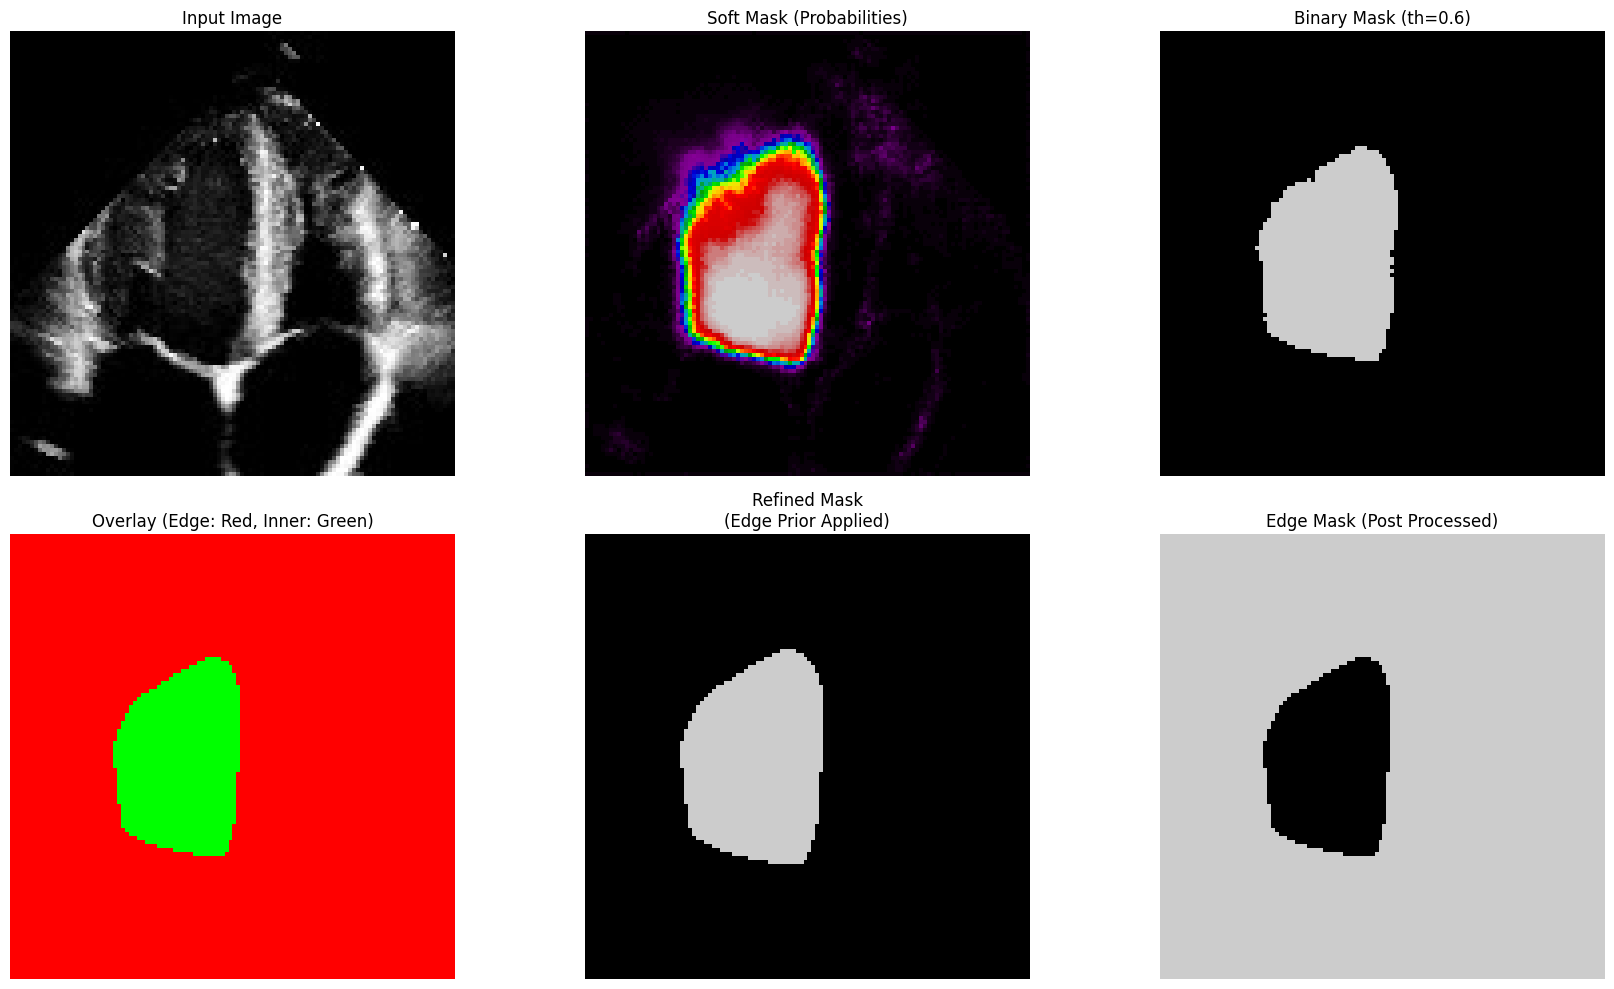

影片 0a65df5ec44d995714744a44c6357d5e_0000_0003，顯示幀 159


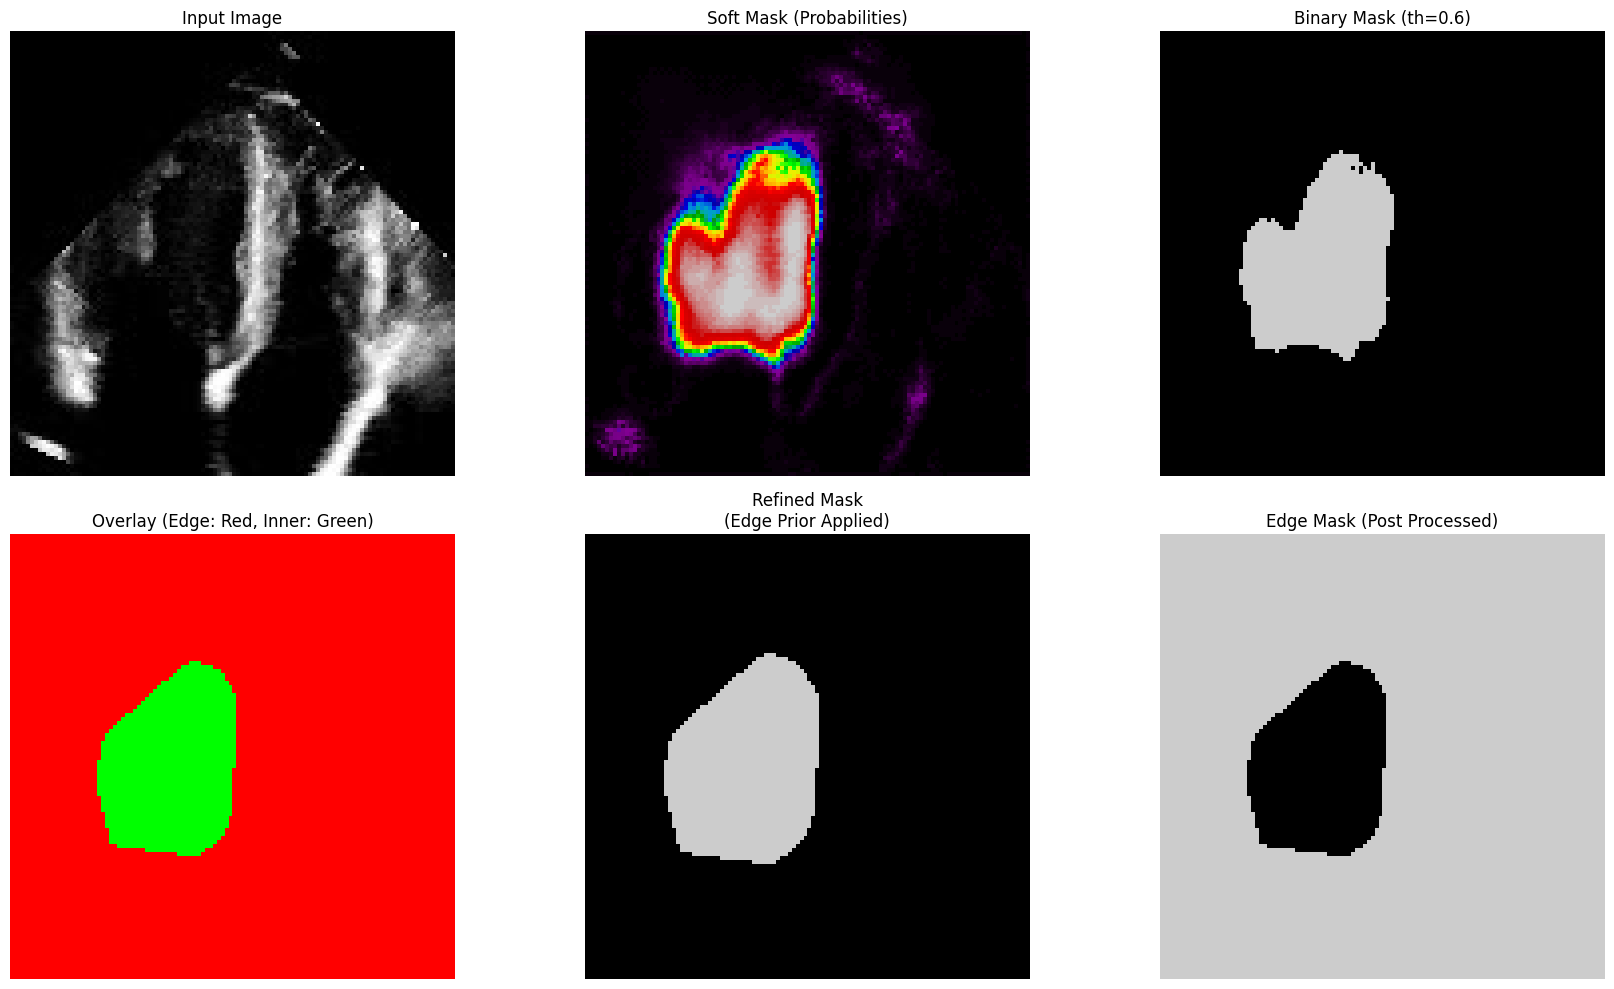

影片 0daf7d557af3997fb5dabde6a042c91c_0000_0000 總幀數：122
影片 0daf7d557af3997fb5dabde6a042c91c_0000_0000，顯示幀 31


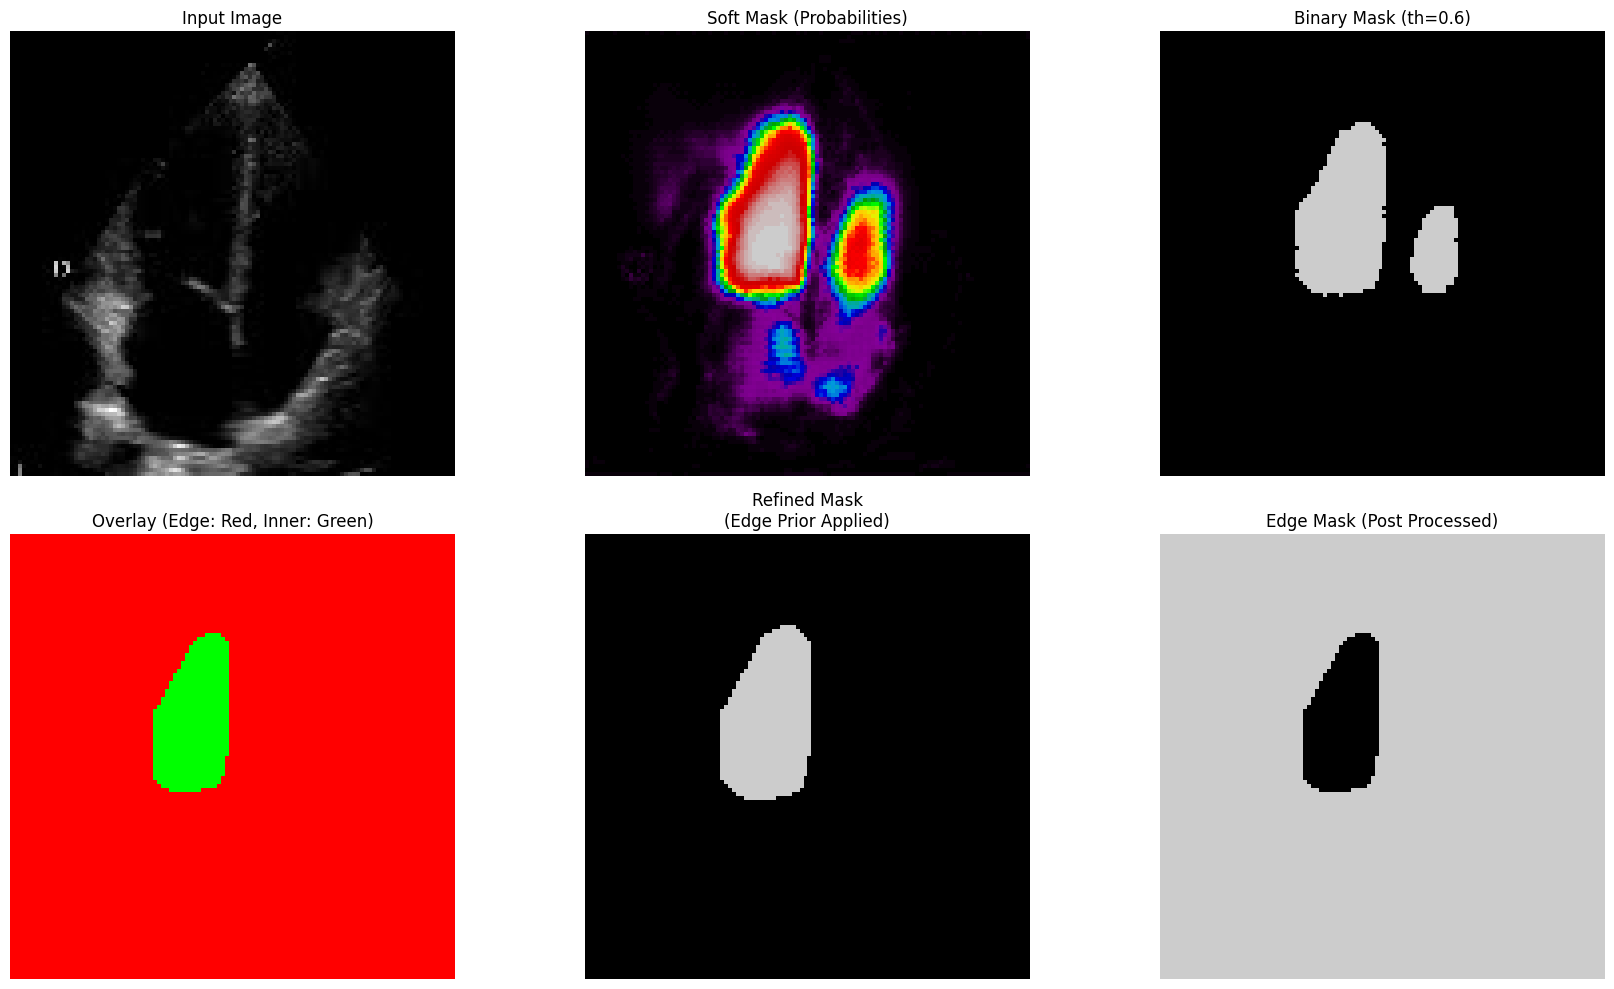

影片 0daf7d557af3997fb5dabde6a042c91c_0000_0000，顯示幀 55


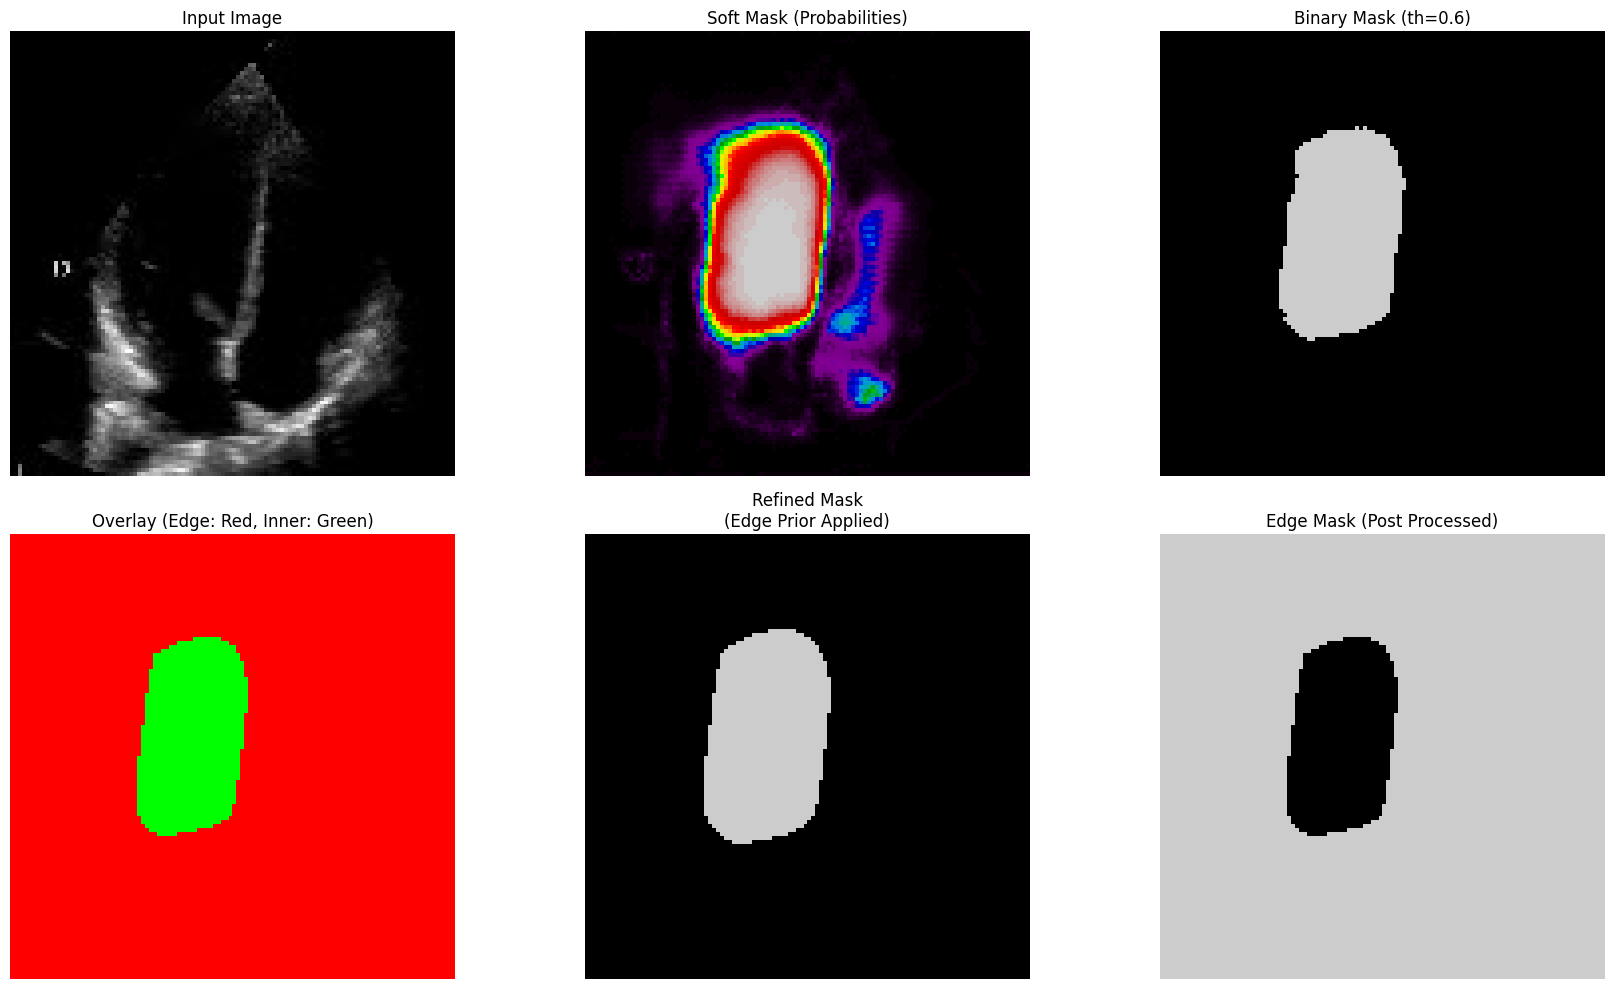

影片 0daf7d557af3997fb5dabde6a042c91c_0000_0000，顯示幀 109


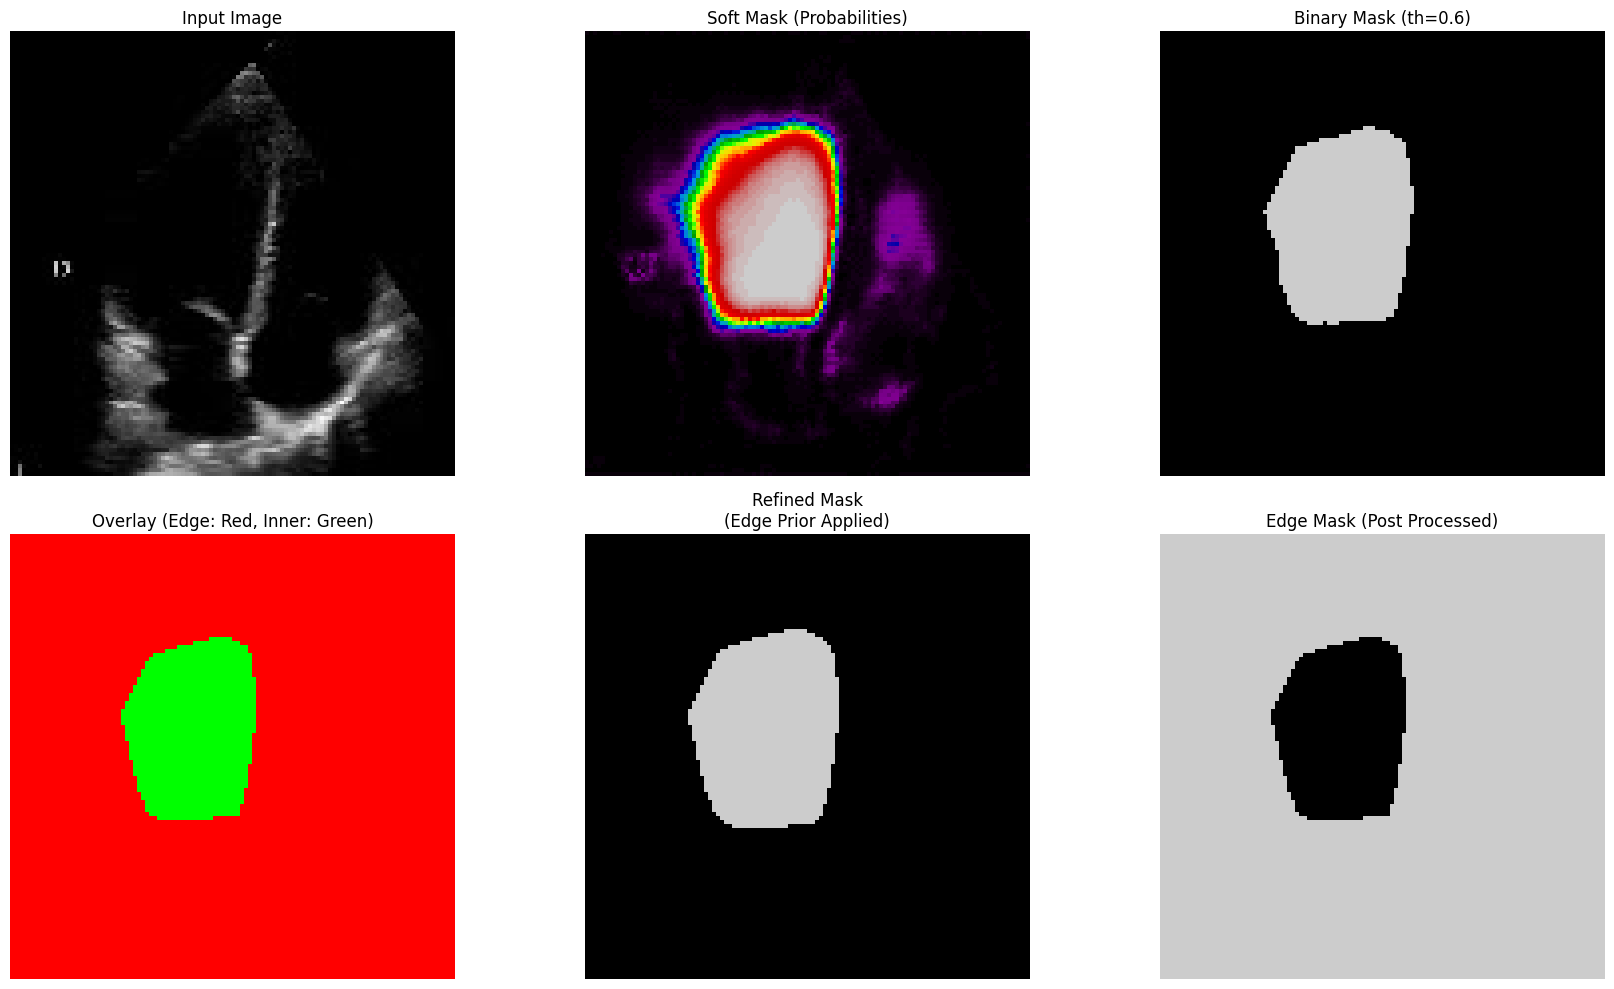

影片 38e01827544c7915fe065a313e0983cb_0000_0001 總幀數：157
影片 38e01827544c7915fe065a313e0983cb_0000_0001，顯示幀 5


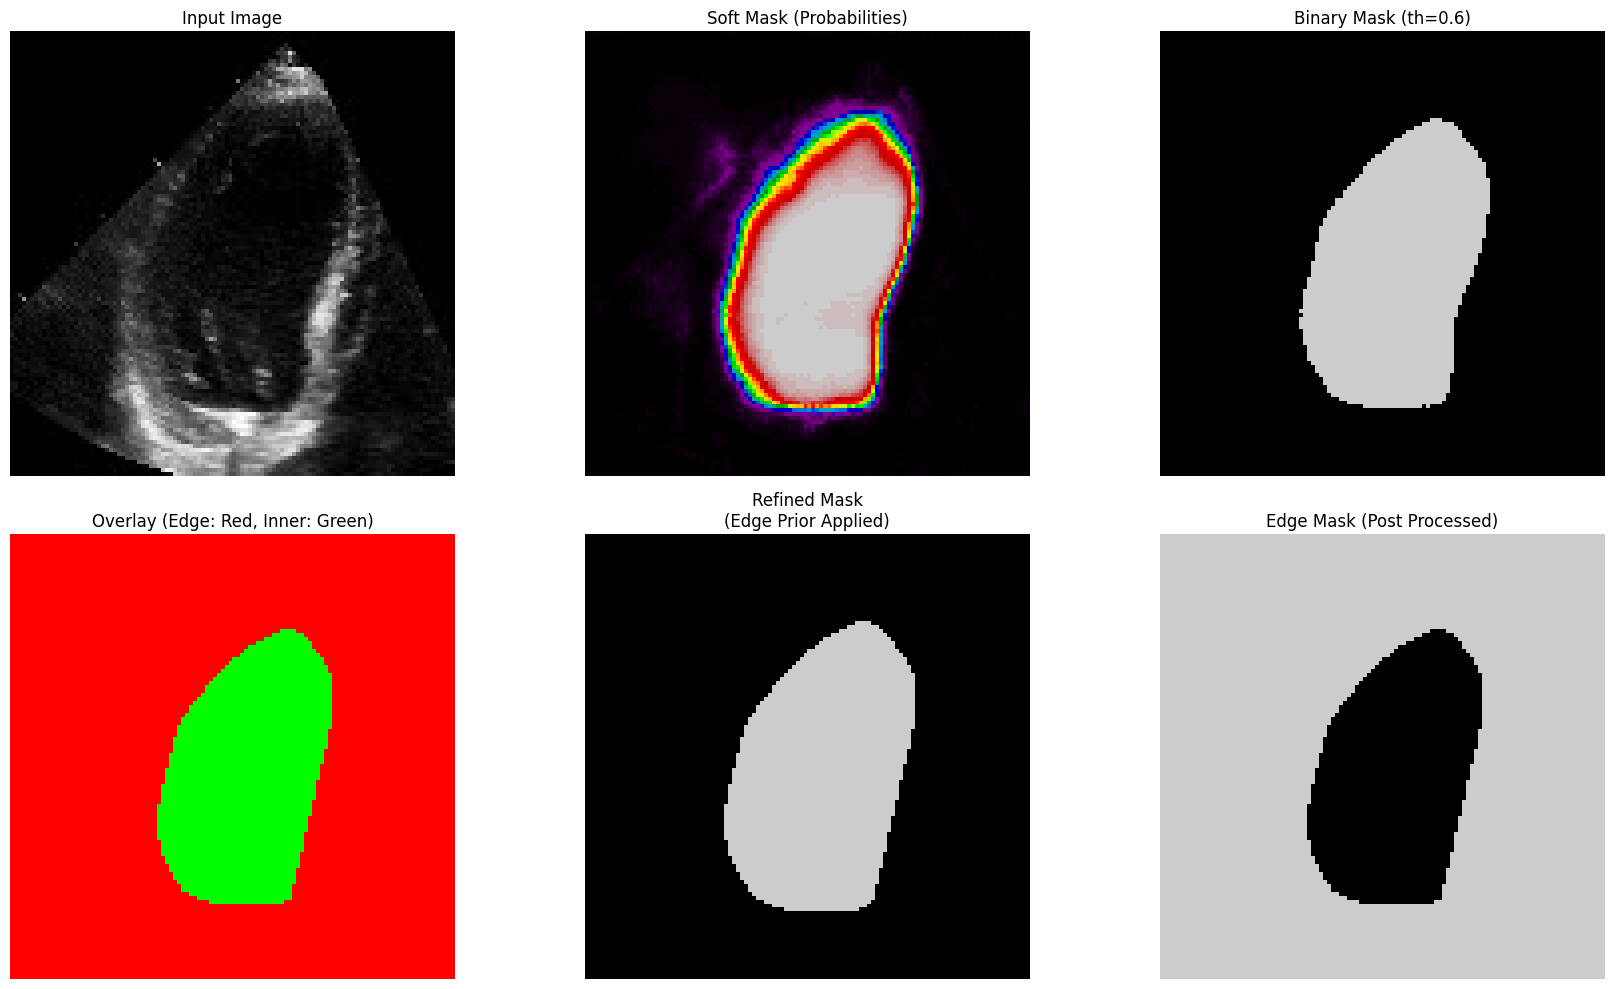

影片 38e01827544c7915fe065a313e0983cb_0000_0001，顯示幀 88


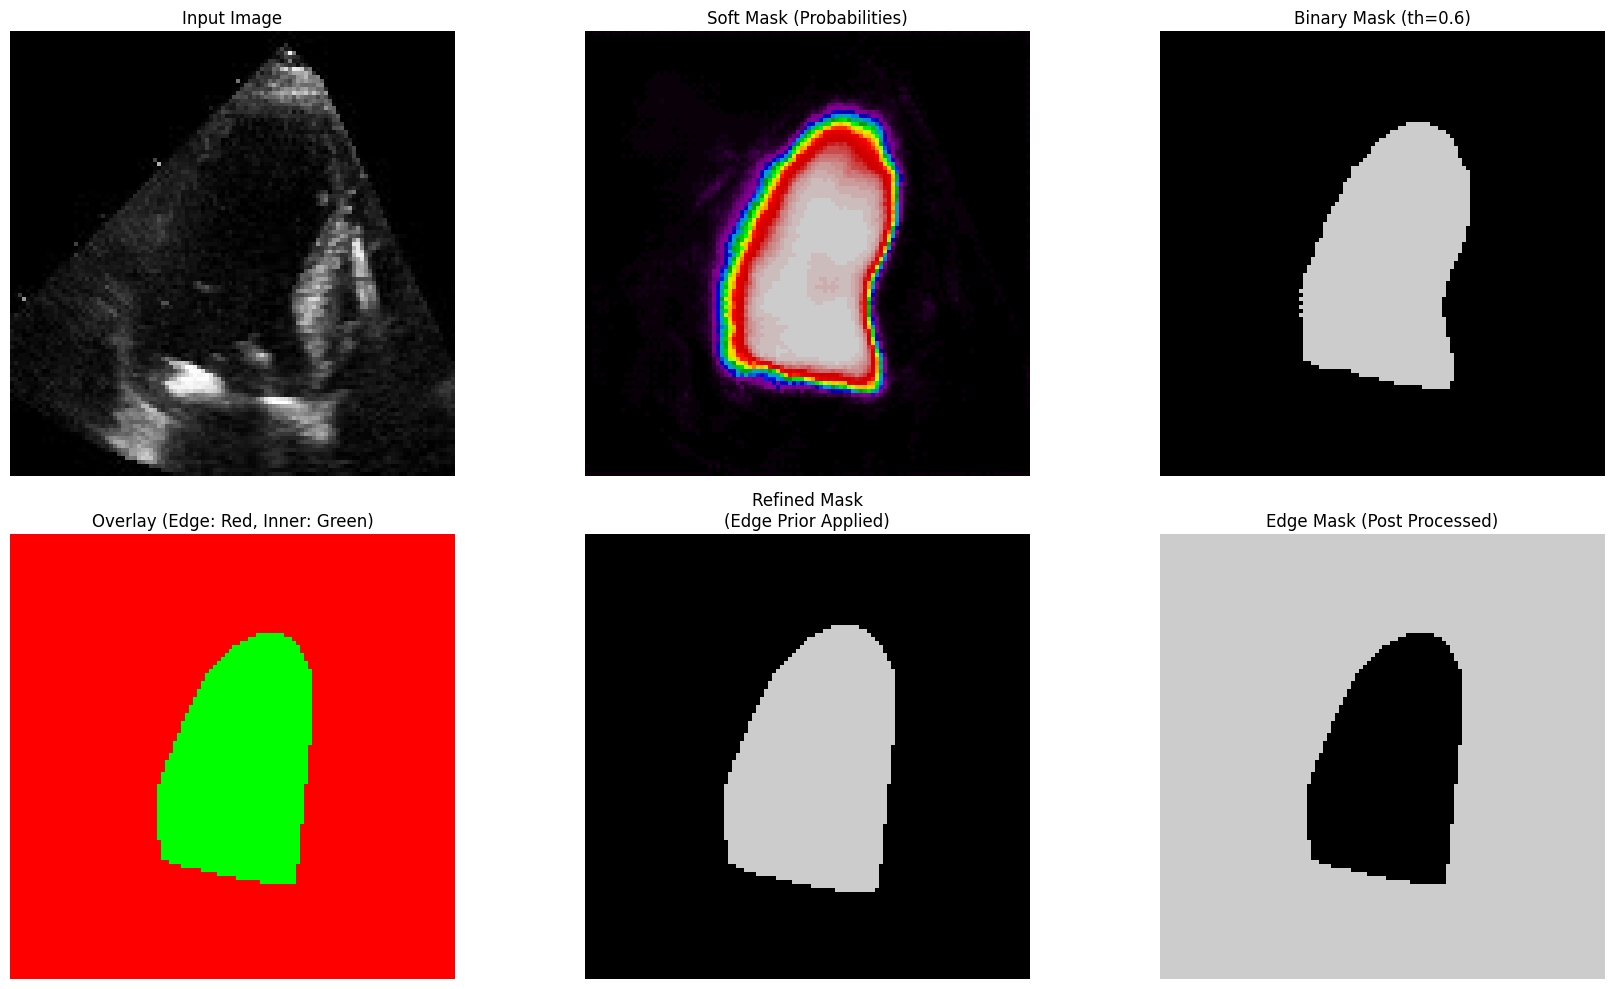

影片 38e01827544c7915fe065a313e0983cb_0000_0001，顯示幀 113


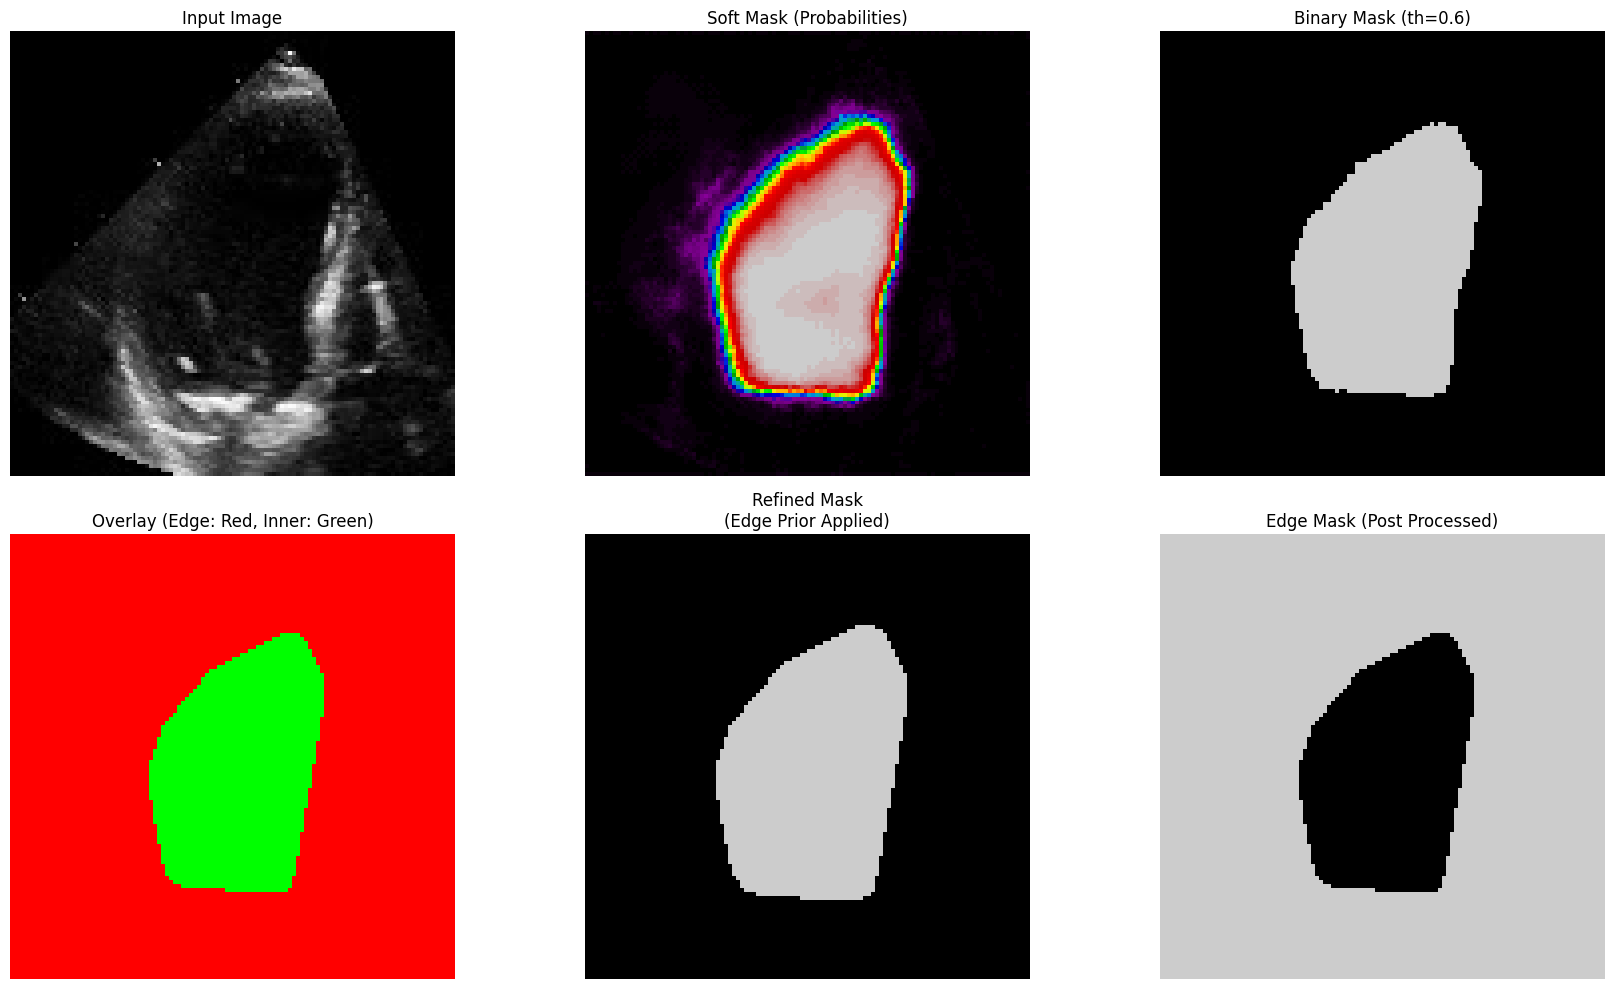

影片 8c9529400e44968fc190dc6ecb277827_0000_0003 總幀數：191
影片 8c9529400e44968fc190dc6ecb277827_0000_0003，顯示幀 133


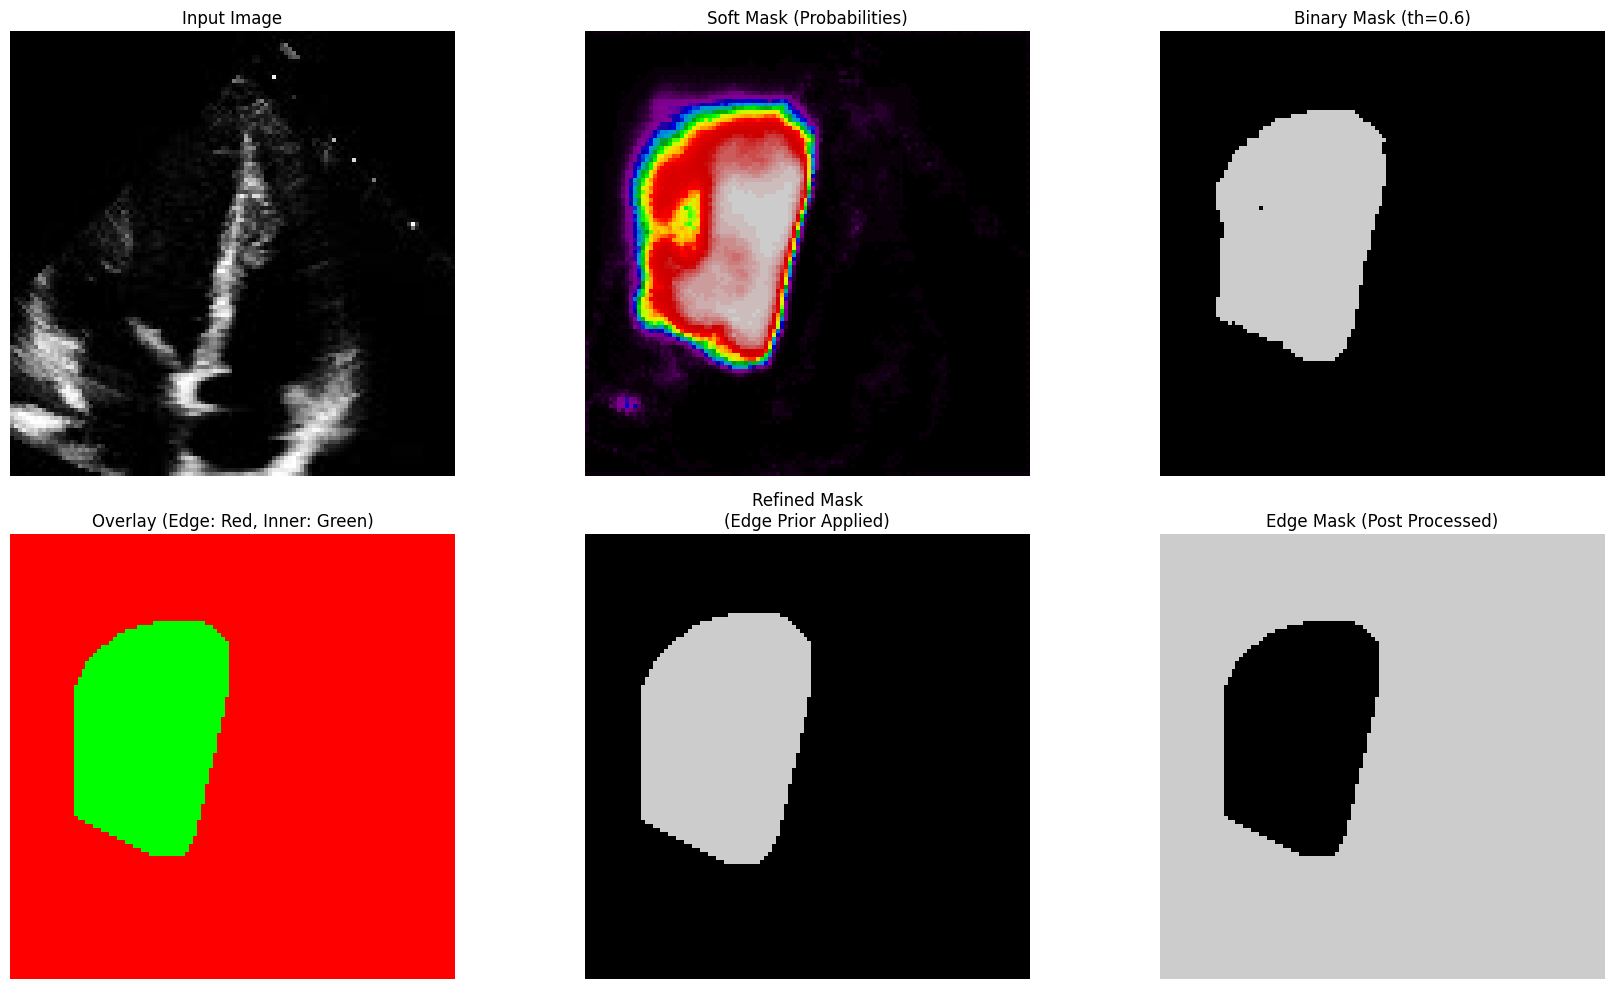

影片 8c9529400e44968fc190dc6ecb277827_0000_0003，顯示幀 152


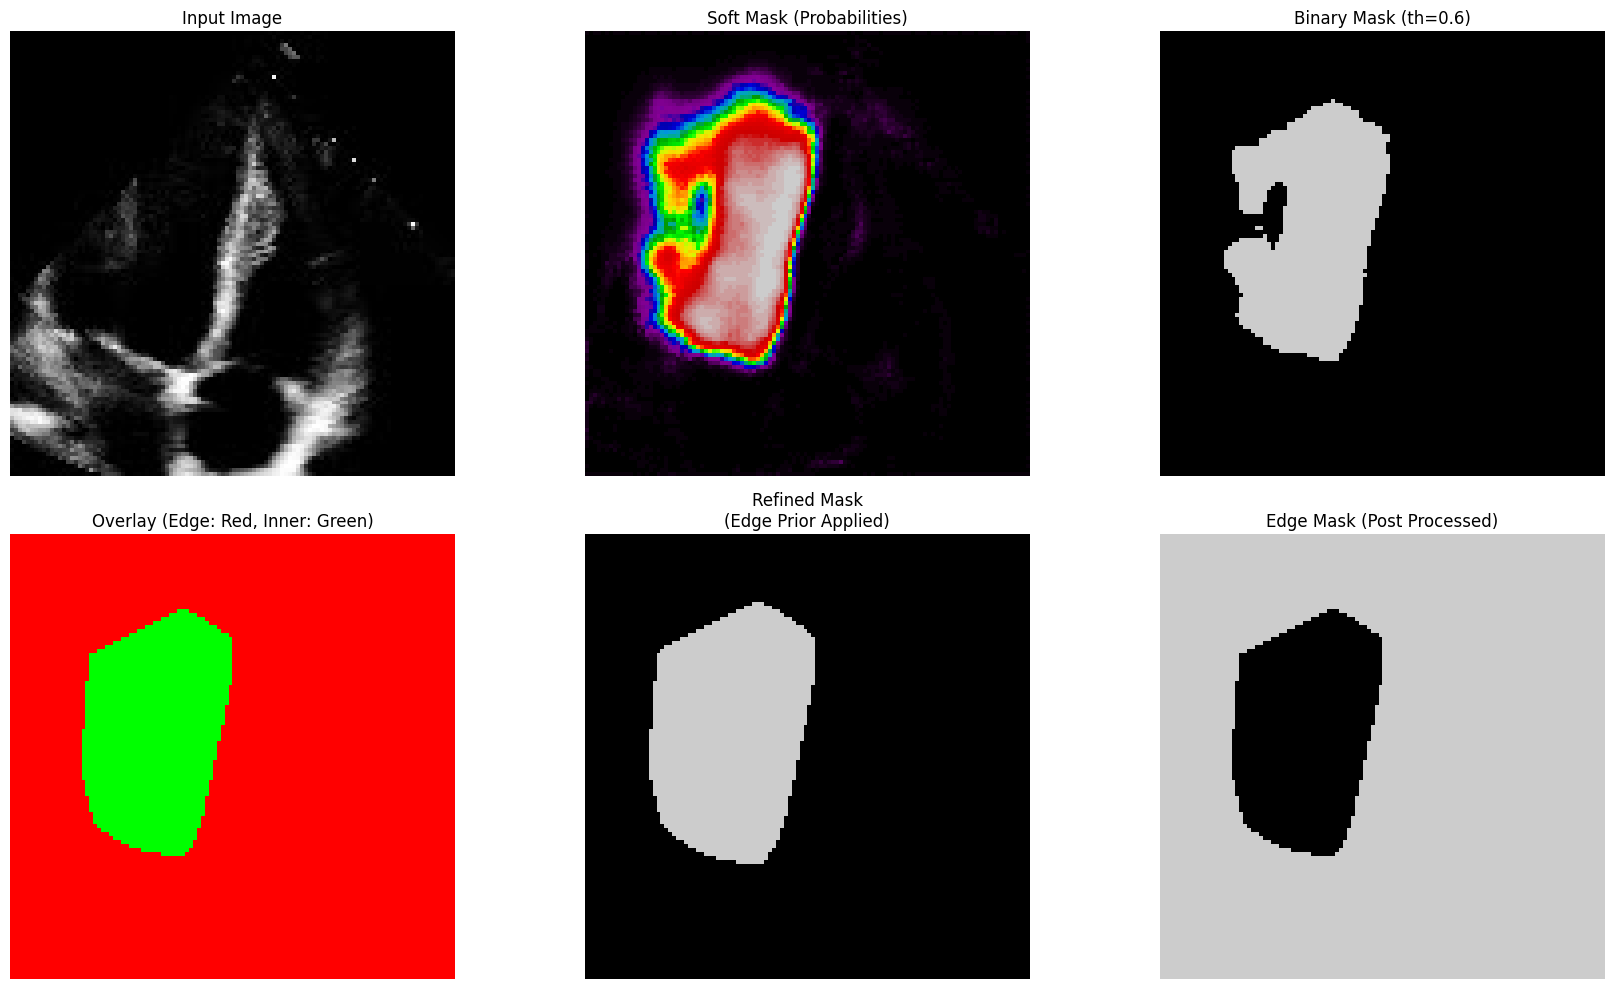

影片 8c9529400e44968fc190dc6ecb277827_0000_0003，顯示幀 171


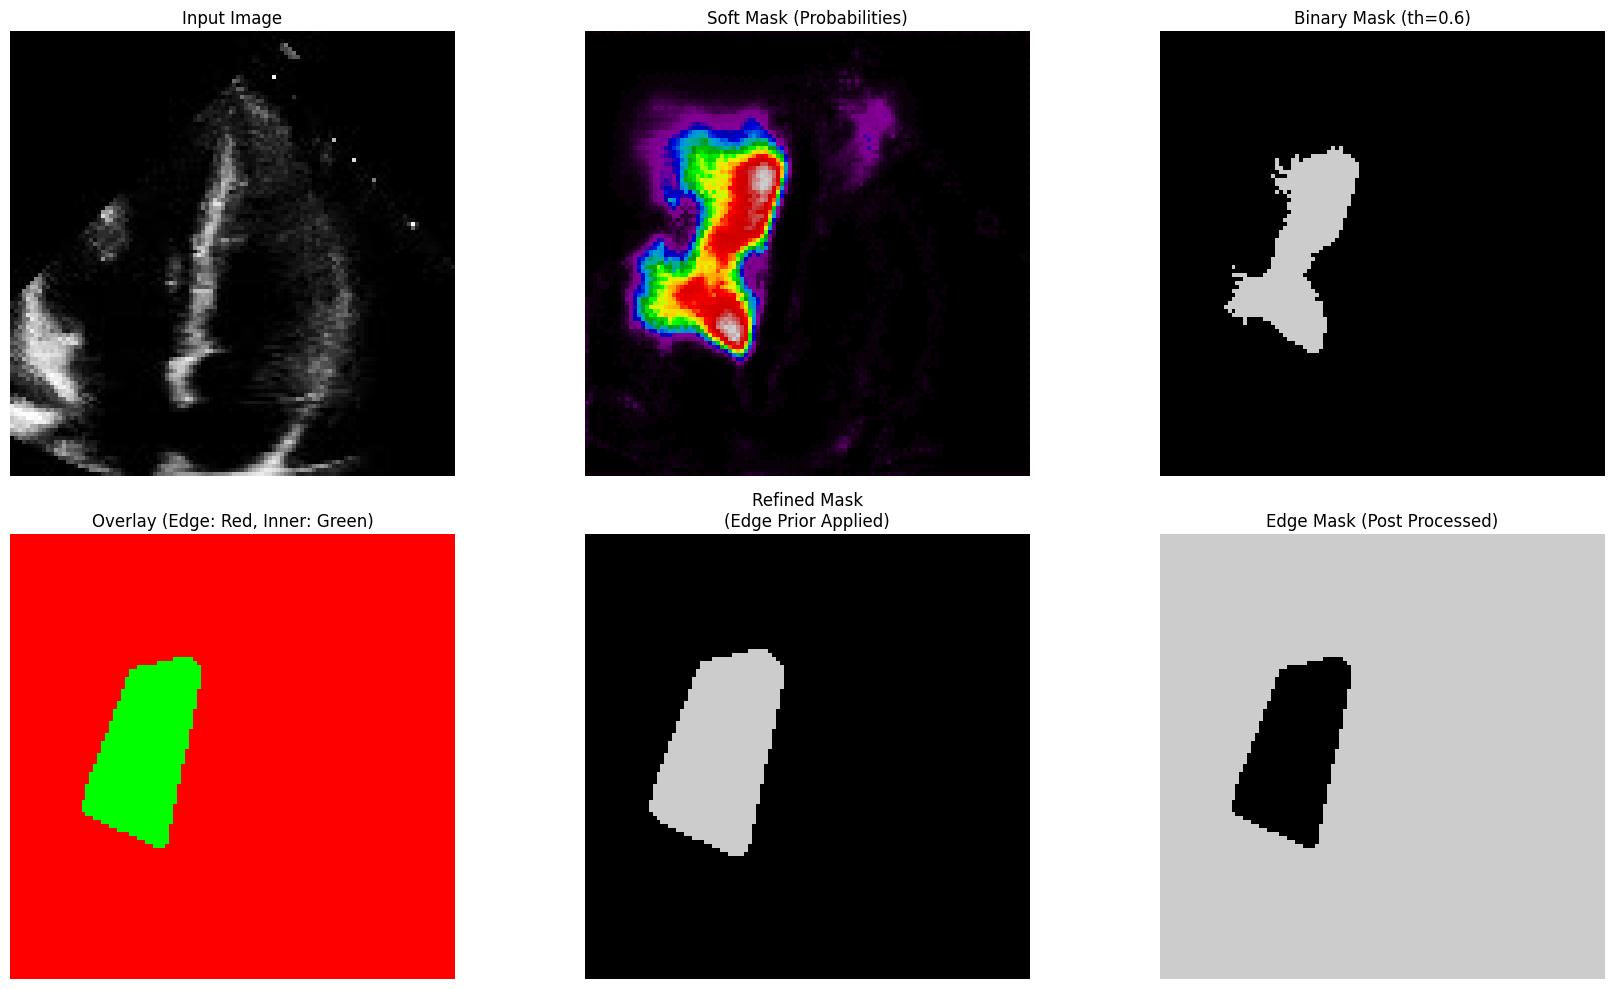

影片 09bd6f1340f64f0ef6c403ce7ee26009_0000_0001 總幀數：161
影片 09bd6f1340f64f0ef6c403ce7ee26009_0000_0001，顯示幀 100


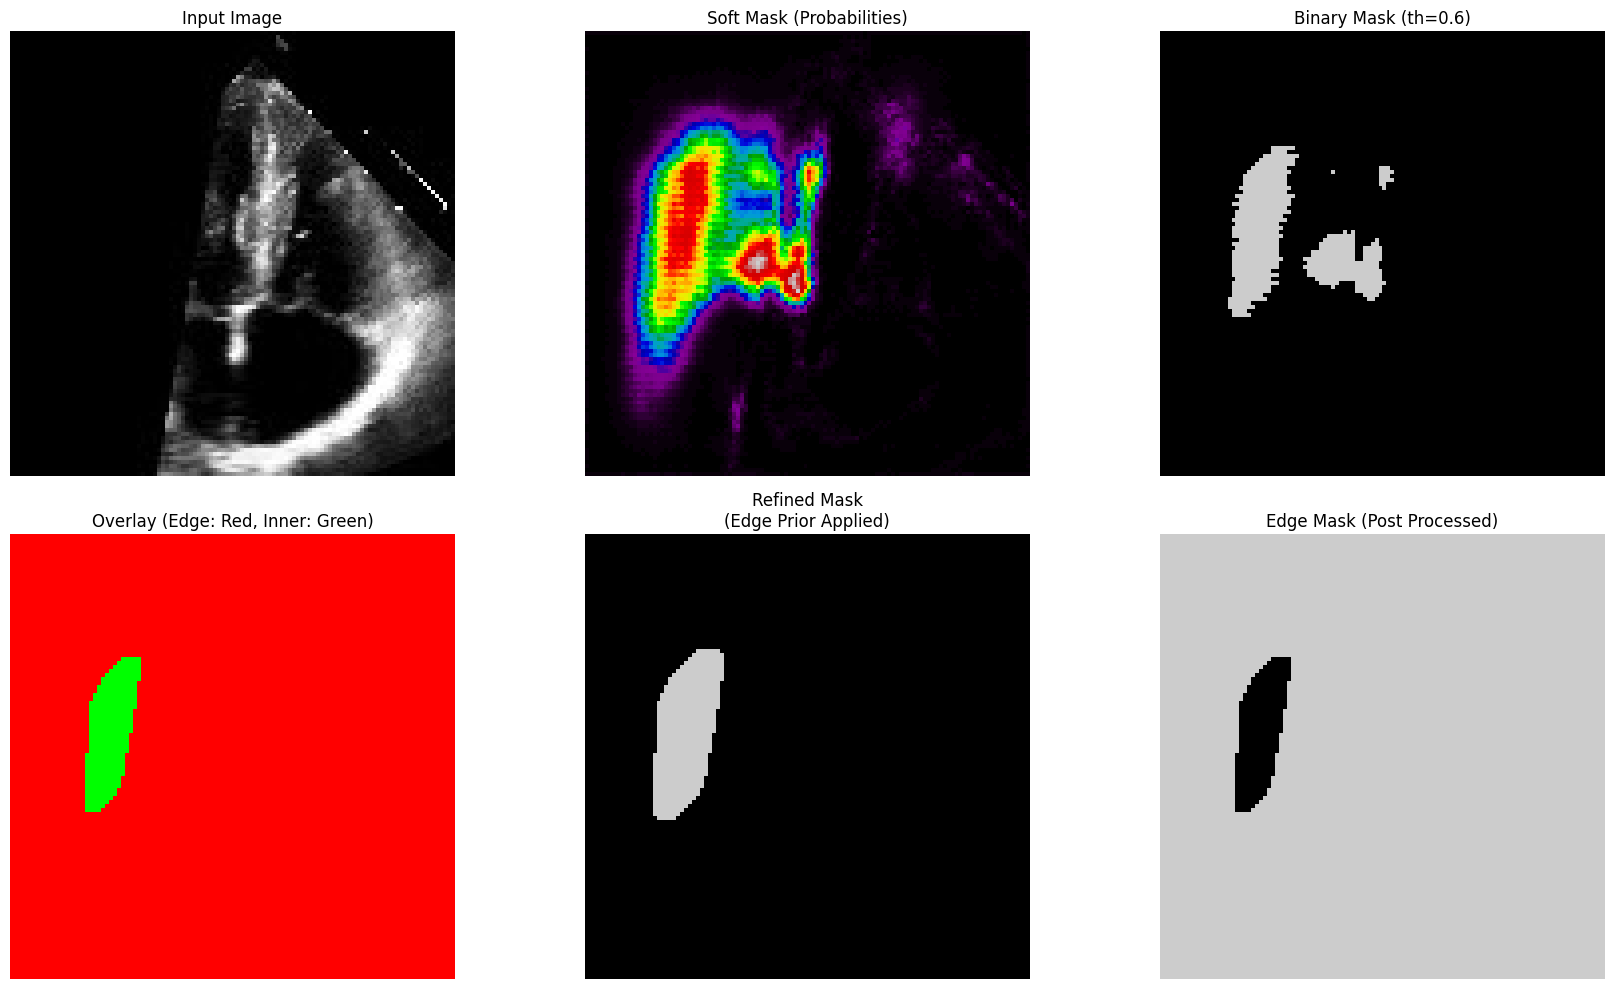

影片 09bd6f1340f64f0ef6c403ce7ee26009_0000_0001，顯示幀 129


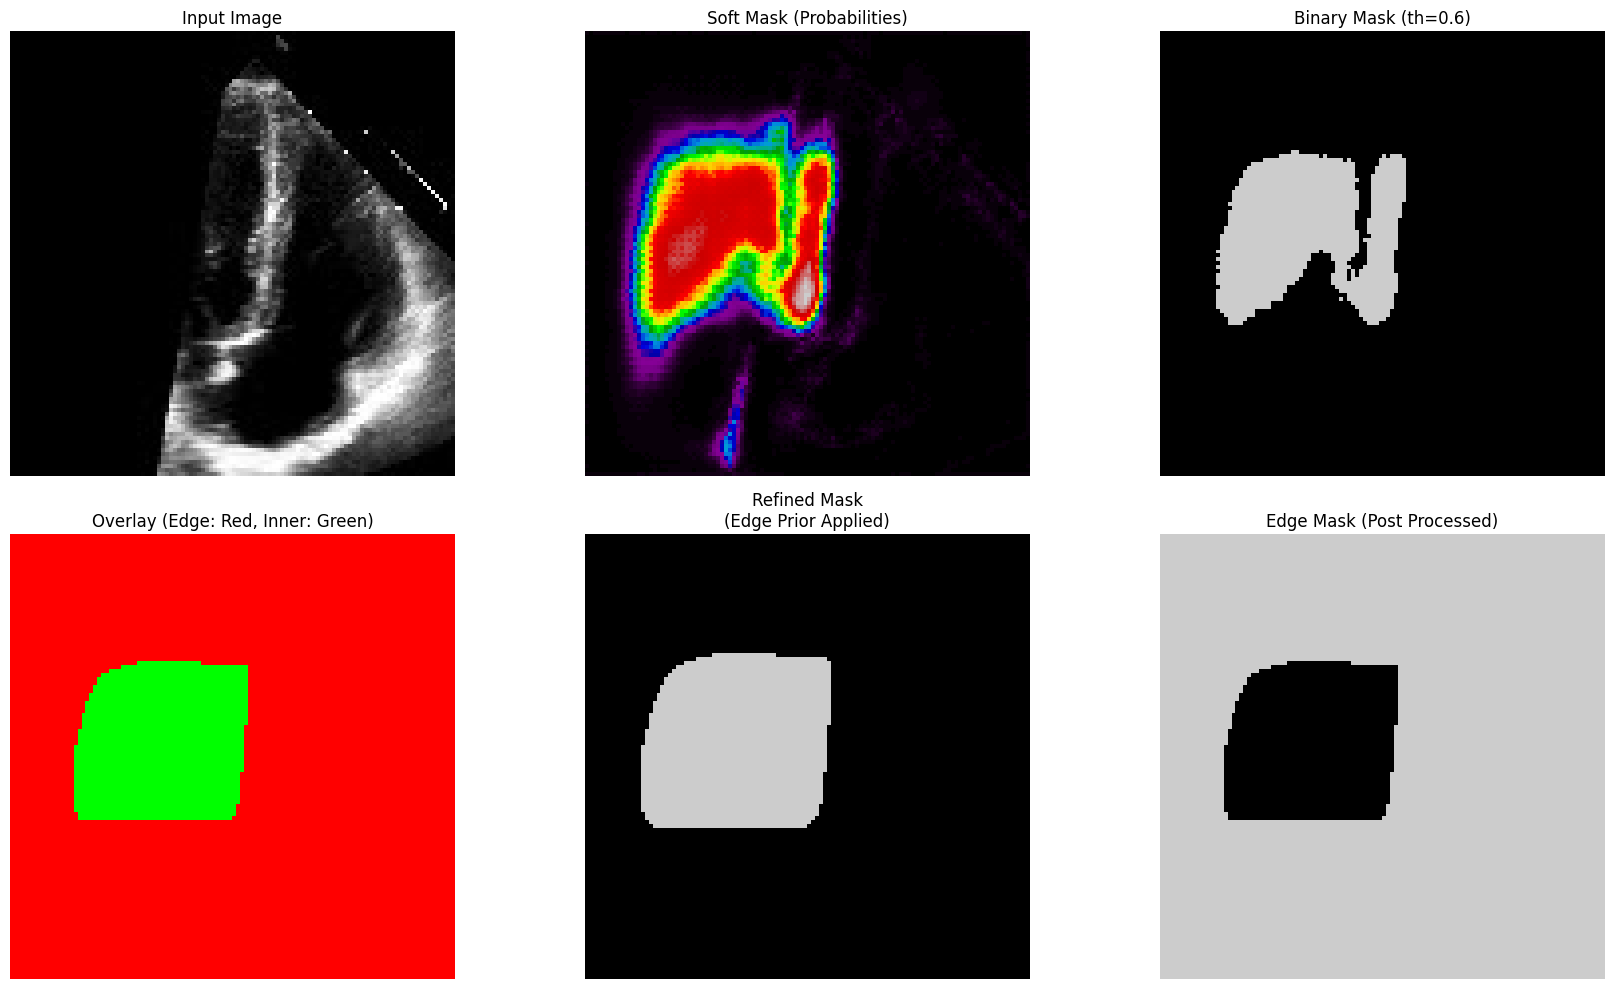

影片 09bd6f1340f64f0ef6c403ce7ee26009_0000_0001，顯示幀 132


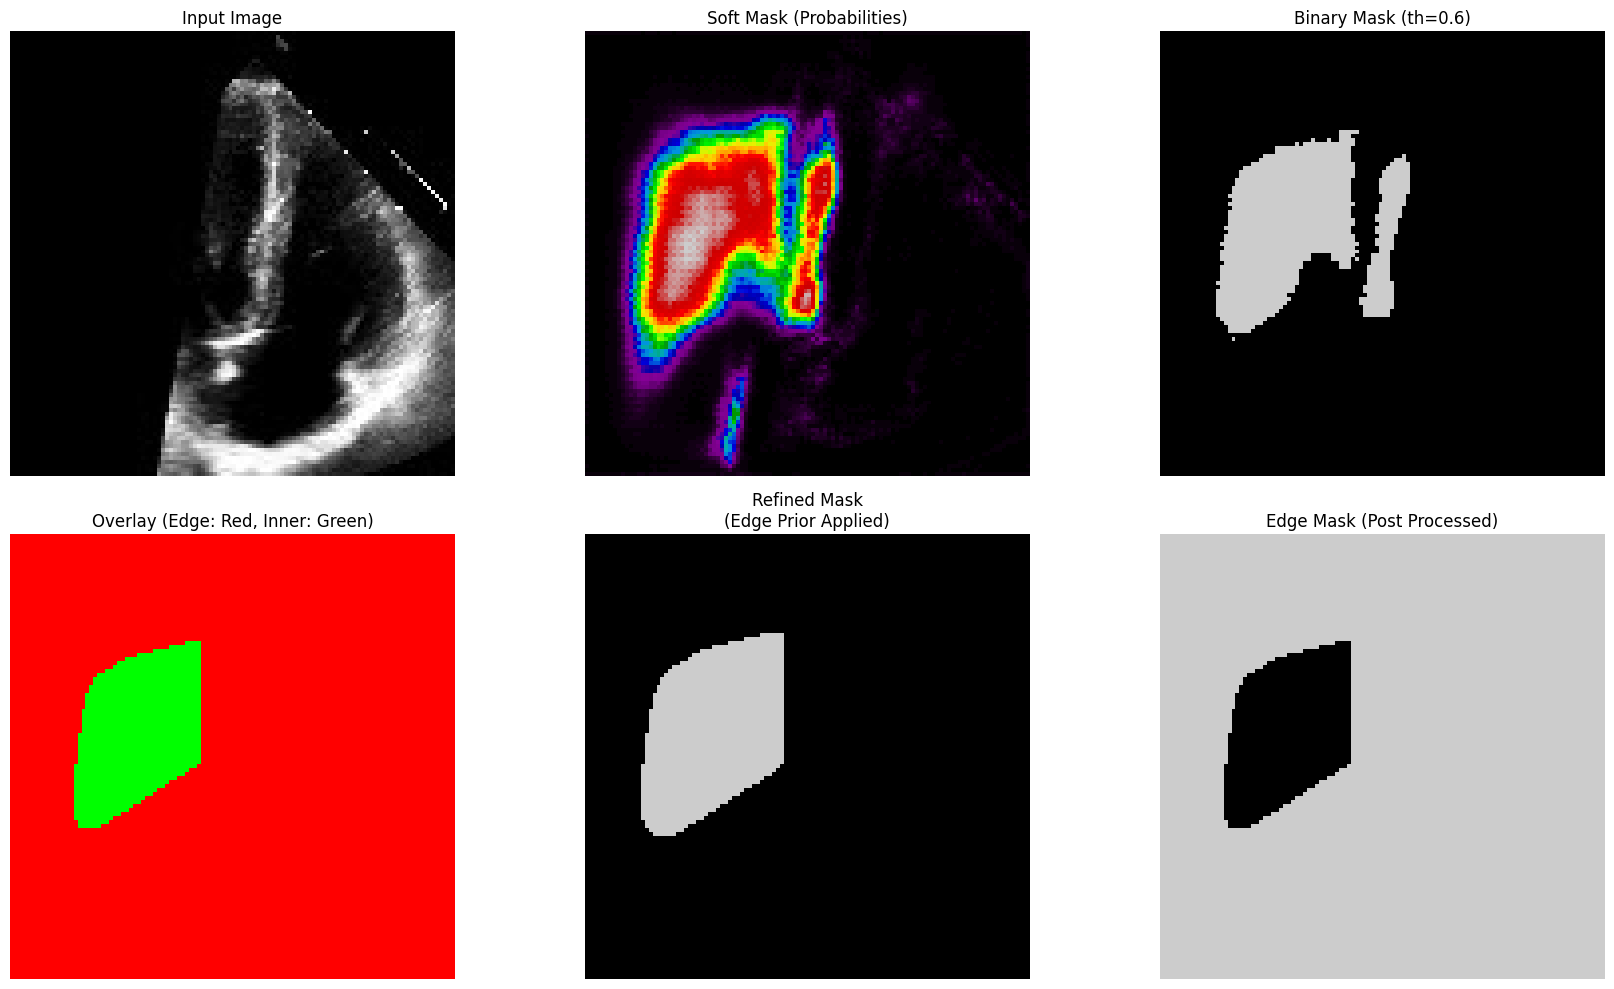

影片 15cc87ae012d6997a3b92381ed087d21_0000_0000 總幀數：59
影片 15cc87ae012d6997a3b92381ed087d21_0000_0000，顯示幀 18


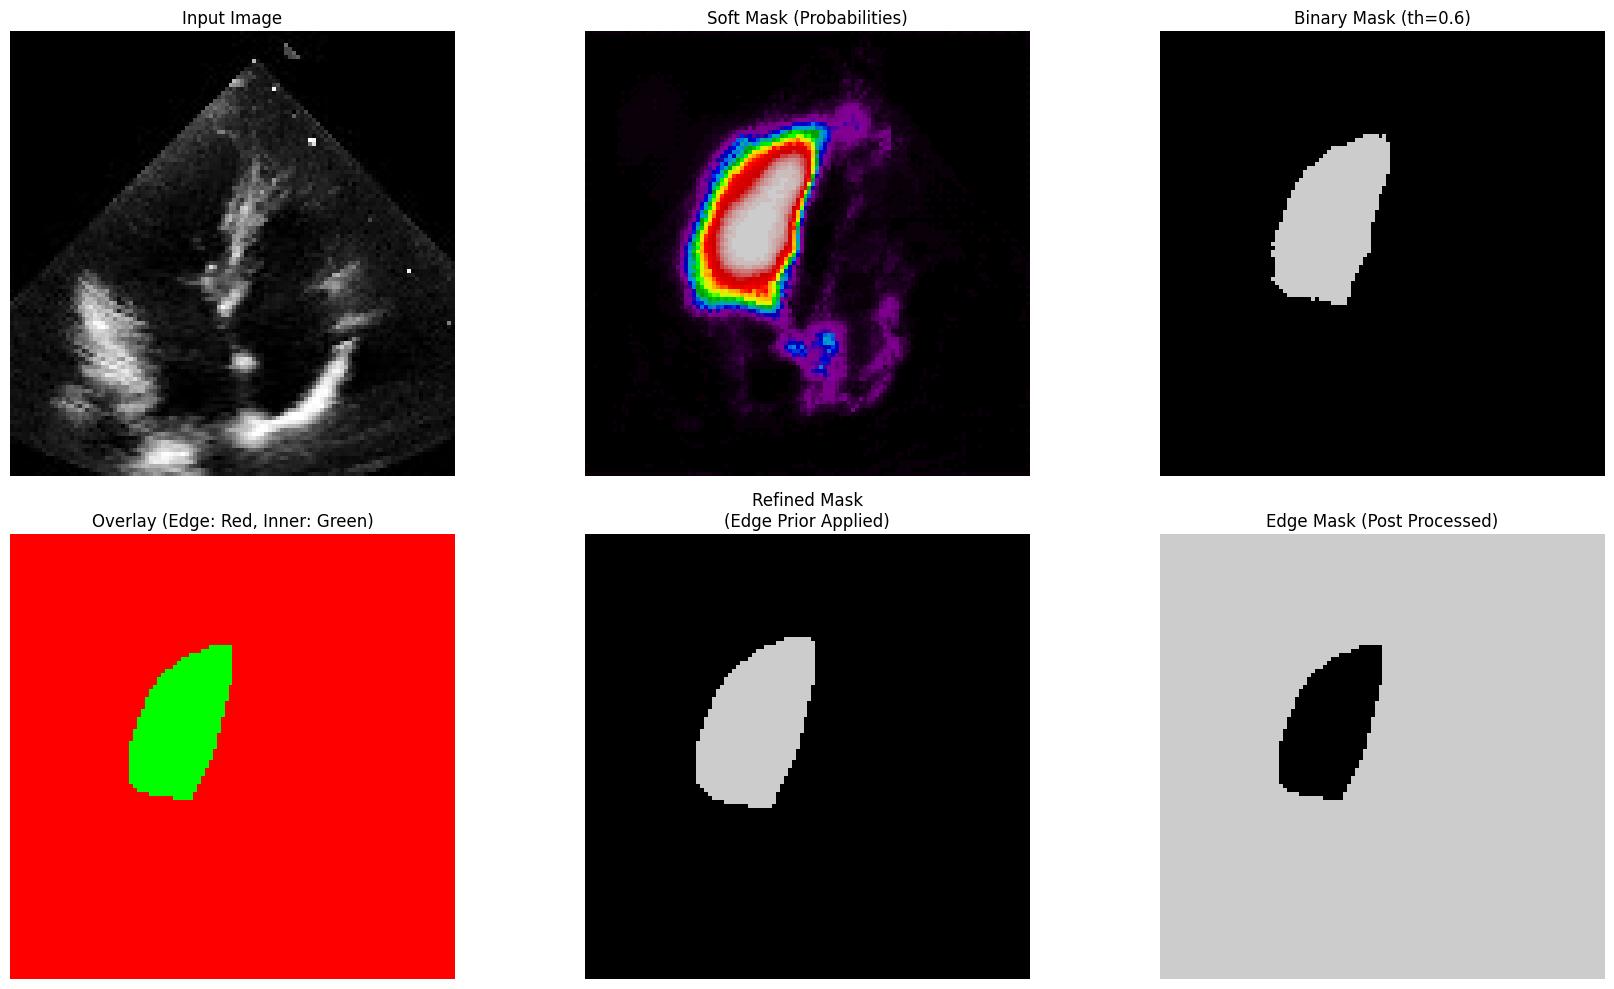

影片 15cc87ae012d6997a3b92381ed087d21_0000_0000，顯示幀 35


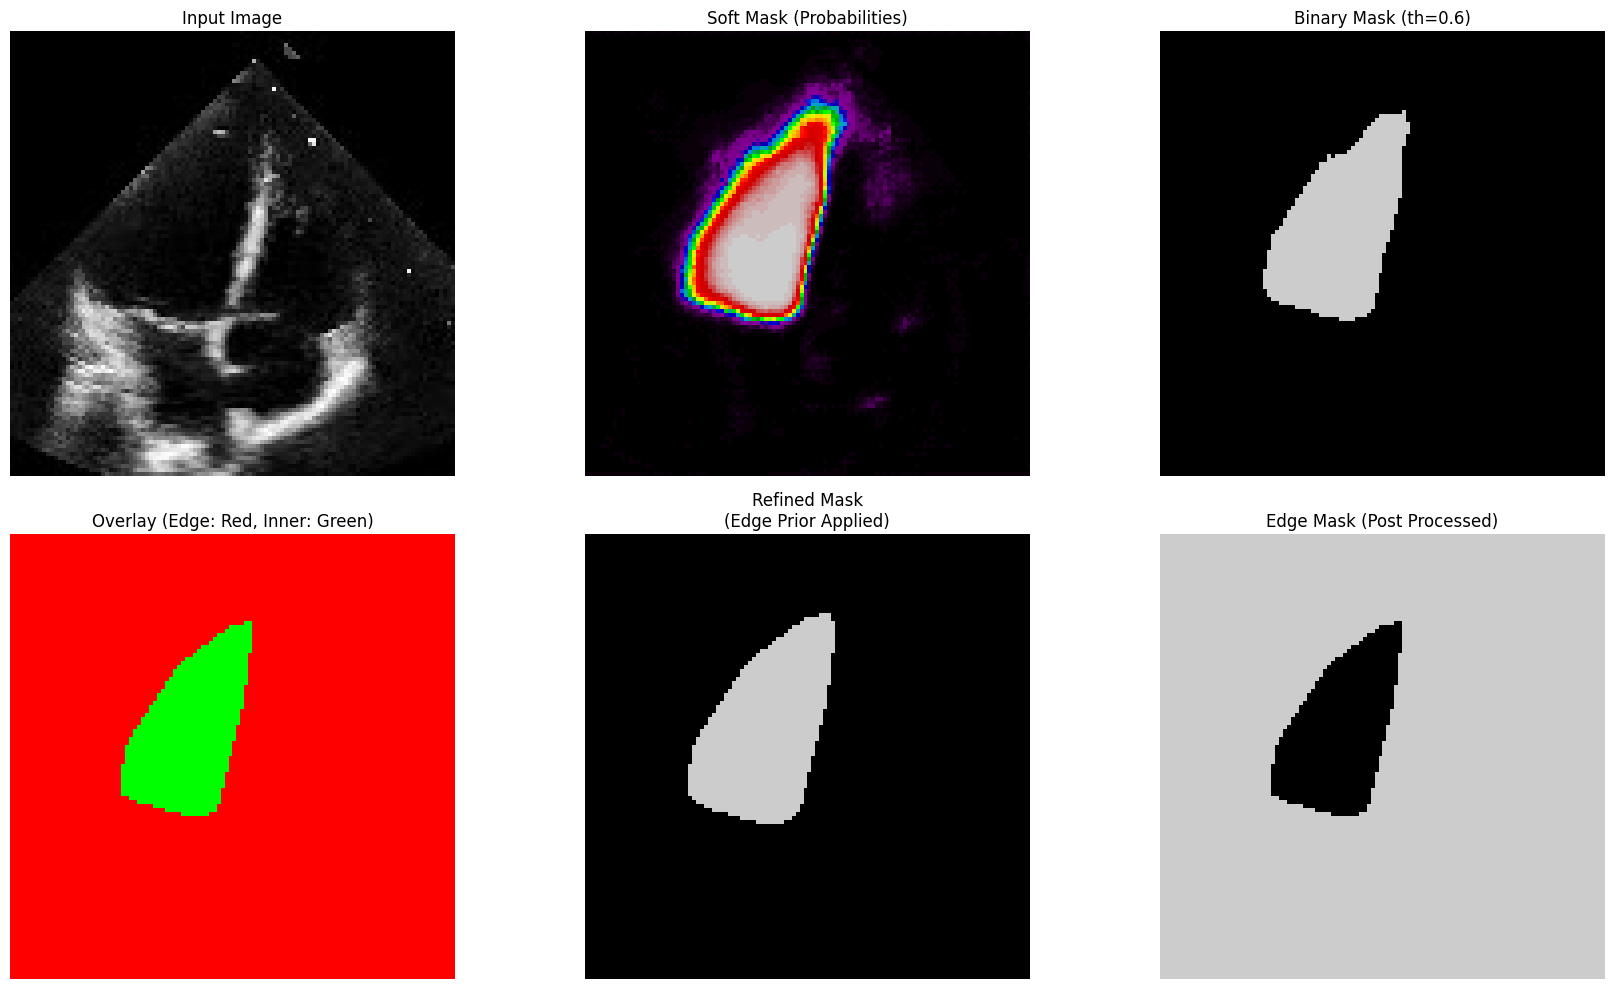

影片 15cc87ae012d6997a3b92381ed087d21_0000_0000，顯示幀 58


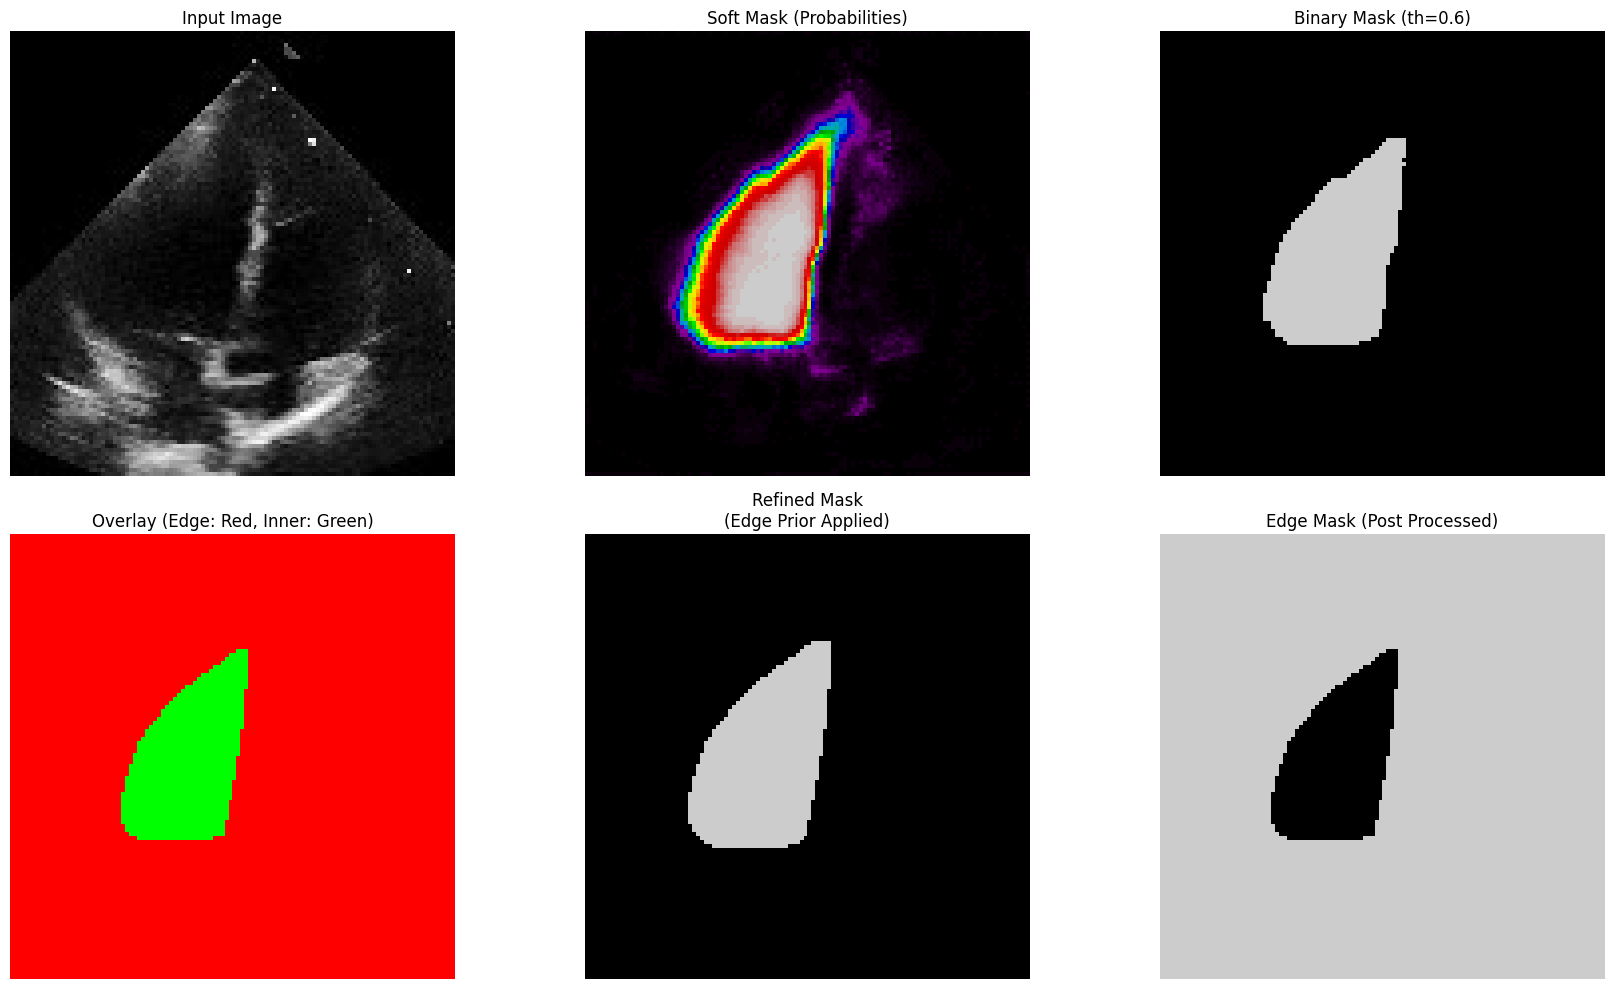

In [ ]:
import os
import random
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image

###########################
# 模型與基本視覺化函數定義
###########################

# --- U-Net 模型定義 ---
class DoubleConv(nn.Module):
    """(convolution => [BN] => ReLU) * 2"""
    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )
    def forward(self, x):
        return self.double_conv(x)

class Down(nn.Module):
    """Downscaling with maxpool then double conv"""
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels)
        )
    def forward(self, x):
        return self.maxpool_conv(x)

class Up(nn.Module):
    """Upscaling then double conv"""
    def __init__(self, in_channels, out_channels, bilinear=True):
        super().__init__()
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
            self.conv = DoubleConv(in_channels, out_channels, in_channels // 2)
        else:
            self.up = nn.ConvTranspose2d(in_channels, in_channels // 2, kernel_size=2, stride=2)
            self.conv = DoubleConv(in_channels, out_channels)
    def forward(self, x1, x2):
        x1 = self.up(x1)
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]
        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)

class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)
    def forward(self, x):
        return self.conv(x)

class UNet(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear=False):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear
        self.inc = DoubleConv(n_channels, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256)
        self.down3 = Down(256, 512)
        factor = 2 if bilinear else 1
        self.down4 = Down(512, 1024 // factor)
        self.up1 = Up(1024, 512 // factor, bilinear)
        self.up2 = Up(512, 256 // factor, bilinear)
        self.up3 = Up(256, 128 // factor, bilinear)
        self.up4 = Up(128, 64, bilinear)
        self.outc = OutConv(64, n_classes)
    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        return logits

# --- 基本視覺化方法 ---
def display_image(image, ax, title="Input Image"):
    ax.imshow(image, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

def display_mask(mask, ax, title="Mask"):
    ax.imshow(mask, cmap='nipy_spectral')
    ax.set_title(title)
    ax.axis('off')

###########################
# 臨床後處理：僅對邊緣應用先驗形狀（非橢圓化），決定邊緣後將內部全部填滿
###########################
def apply_edge_prior(binary_mask):
    """
    對二值遮罩僅針對邊緣部分應用先驗平滑：
      1. 保留最大連通區。
      2. 找出該區域的邊緣輪廓，利用其凸包作為先驗形狀。
      3. 將凸包內部全部填滿作為最終遮罩，保留原始預測區的完整性。
    
    :param binary_mask: 二值遮罩 (numpy array，值為 0 與 1)
    :return: refined_mask (後處理後的遮罩，值為 0 與 255)
    """
    # 若遮罩值在 [0, 1]，轉換為 0-255 的 uint8
    if binary_mask.max() <= 1:
        mask_uint8 = (binary_mask * 255).astype(np.uint8)
    else:
        mask_uint8 = binary_mask.copy()
    
    # 取得所有連通區，保留最大連通區
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(mask_uint8, connectivity=8)
    if num_labels > 1:
        largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
        largest_component = (labels == largest_label).astype(np.uint8) * 255
    else:
        largest_component = mask_uint8.copy()
    
    # 找出最大連通區的邊緣輪廓
    contours, _ = cv2.findContours(largest_component, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        return largest_component
    largest_contour = max(contours, key=cv2.contourArea)
    # 改用凸包（convex hull）作為先驗形狀，不強制變成橢圓
    hull = cv2.convexHull(largest_contour)
    refined_mask = np.zeros_like(largest_component)
    cv2.drawContours(refined_mask, [hull], -1, 255, thickness=-1)  # 填滿凸包內部
    return refined_mask

def post_process_mask(binary_mask, edge_width=5):
    """
    對應用先驗邊緣調整後的遮罩進行後續處理：
      利用距離轉換將該遮罩劃分為邊緣區與內部區。
    
    :param binary_mask: 原始二值遮罩 (numpy array, 0/1)
    :param edge_width: 定義邊緣區的寬度 (像素)
    :return: refined_mask, edge_mask, inner_mask
    """
    refined_mask = apply_edge_prior(binary_mask)
    dist_transform = cv2.distanceTransform(refined_mask, cv2.DIST_L2, 5)
    edge_mask = (dist_transform <= edge_width).astype(np.uint8)
    inner_mask = ((dist_transform > edge_width) & (refined_mask == 255)).astype(np.uint8)
    return refined_mask, edge_mask, inner_mask

def create_overlay(image_np, edge_mask, inner_mask):
    """
    將原始灰階影像疊加上邊緣與內部區遮罩：
      邊緣以紅色表示，內部以綠色表示。
    
    :param image_np: 原始灰階影像 (H x W)
    :param edge_mask: 邊緣遮罩 (H x W), 0/1
    :param inner_mask: 內部遮罩 (H x W), 0/1
    :return: 疊加後的 RGB 影像
    """
    overlay = np.stack([image_np, image_np, image_np], axis=-1).astype(np.float32)
    overlay = (overlay - overlay.min()) / (overlay.max() - overlay.min() + 1e-6) * 255.0
    overlay[edge_mask == 1] = [255, 0, 0]   # 邊緣標示為紅色
    overlay[inner_mask == 1] = [0, 255, 0]    # 內部標示為綠色
    return overlay.astype(np.uint8)

def visualize_comparison_result(image_tensor, pred_tensor, threshold=0.5, edge_width=5):
    """
    同時展示無後處理與經後處理（僅對邊緣應用先驗平滑後填滿區域）的結果：
      上排：原始預測結果（soft mask 與僅依閾值二值化）。
      下排：後處理結果（應用先驗邊緣後填滿內部，再利用距離轉換獲得邊緣與內部區）。
    
    :param image_tensor: 原始影像 tensor，shape (1, H, W)
    :param pred_tensor: 模型預測 tensor，shape (1, H, W)
    :param threshold: 二值化閾值
    :param edge_width: 定義邊緣區寬度 (像素)
    """
    image_np = image_tensor.cpu().numpy().squeeze()
    softmask_np = pred_tensor.cpu().numpy().squeeze()
    
    # 原始僅依閾值的二值遮罩
    binary_mask_np = (softmask_np > threshold).astype(np.uint8)
    
    # 後處理：僅對邊緣應用先驗平滑後填滿內部
    refined_mask, edge_mask, inner_mask = post_process_mask(binary_mask_np, edge_width=edge_width)
    overlay = create_overlay(image_np, edge_mask, inner_mask)
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    # 第一排：原始結果
    display_image(image_np, axes[0, 0], title="Input Image")
    display_mask(softmask_np, axes[0, 1], title="Soft Mask (Probabilities)")
    display_mask(binary_mask_np, axes[0, 2], title=f"Binary Mask (th={threshold})")
    
    # 第二排：後處理結果
    axes[1, 0].imshow(overlay)
    axes[1, 0].set_title("Overlay (Edge: Red, Inner: Green)")
    axes[1, 0].axis('off')
    display_mask(refined_mask, axes[1, 1], title="Refined Mask\n(Edge Prior Applied)")
    display_mask(edge_mask, axes[1, 2], title="Edge Mask (Post Processed)")
    
    plt.tight_layout()
    plt.show()

###########################
# 載入模型與轉換設定
###########################

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNet(n_channels=1, n_classes=1).to(device)
model_path = '/home/richardlin/home/m123140014/echonet/remote_disk_lab/mask/unet_best_model_LV_HorizontalFlip_112.pth'
if os.path.exists(model_path):
    model.load_state_dict(torch.load(model_path, map_location=device))
    print(f"已成功載入預訓練權重：{model_path}")
else:
    print("找不到預訓練權重，請確認模型檔案是否存在！")

# 定義轉換：先調整影像大小，再水平翻轉（全部翻轉），再轉為 Tensor
transform = transforms.Compose([
    transforms.Resize((112, 112)),
    transforms.ToTensor()
])

###########################
# 從 CSV 與多個 AVI 檔案中抽取幀進行推論與展示
###########################

csv_file = "/home/richardlin/home/m123140014/echonet/remote_disk_lab/RV_echonet_test/a4c-video-dir/FileList.csv"
root_dir = "/home/richardlin/home/m123140014/echonet/remote_disk_lab/RV_echonet_test/a4c-video-dir/Videos"


df = pd.read_csv(csv_file)
num_videos_to_test = 10
sample_videos = df['FileName'].sample(num_videos_to_test).tolist()

def get_valid_video_path(video_path):
    if os.path.exists(video_path):
        return video_path
    for ext in ['.avi', '.mp4', '.mkv']:
        test_path = video_path + ext
        if os.path.exists(test_path):
            return test_path
    return None

user_threshold = float(input("請輸入二值化閾值 (例如 0.5): "))
edge_width = int(input("請輸入邊緣寬度 (例如 5): "))

for video_name in sample_videos:
    video_path = os.path.join(root_dir, video_name)
    valid_path = get_valid_video_path(video_path)
    if valid_path is None:
        print("找不到有效的影片檔案：", video_path)
        continue
    
    cap = cv2.VideoCapture(valid_path)
    if not cap.isOpened():
        print("無法開啟影片：", valid_path)
        continue

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"影片 {video_name} 總幀數：{total_frames}")

    num_frames_to_sample = min(3, total_frames)
    random_frames = sorted(random.sample(range(total_frames), num_frames_to_sample))
    extracted_frames = []
    current_frame = 0
    frame_indices = 0
    ret = True
    while ret and frame_indices < len(random_frames):
        ret, frame = cap.read()
        if not ret:
            break
        if current_frame == random_frames[frame_indices]:
            extracted_frames.append(frame)
            frame_indices += 1
        current_frame += 1
    cap.release()

    for idx, frame in enumerate(extracted_frames):
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        pil_img = Image.fromarray(gray_frame)
        input_tensor = transform(pil_img).unsqueeze(0).to(device)  # (1, 1, H, W)
        model.eval()
        with torch.no_grad():
            output = model(input_tensor)
            pred = torch.sigmoid(output)
        print(f"影片 {video_name}，顯示幀 {random_frames[idx]}")
        visualize_comparison_result(input_tensor[0], pred[0], threshold=user_threshold, edge_width=edge_width)
